<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Олег, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

<div class="alert alert-block alert-info">
<b>Комментарий:</b> Николай, добрый день! Спасибо за ревью. Замечания постарался учесть.
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
<font color='green'><br>Привет, Олег! Спасибо) Пошёл смотреть...

# Финальный проект.
# Промышленность. Предсказание температуры стали.

Выводы и комментарии отмечены следующим образом:

<div class="alert alert-block alert-info">
<b>Вывод:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Комментарий:</b> ...
</div>

<font color='orange' style='font-size:16px; font-weight:bold'> Добавления и исправления идут после оранжевого заголовка </font>

<a name="1"></a>
## Содержание/план

1  [Содержание/план](#1)

2  [Описание проекта и постановка задачи.](#2)

* 2.1  [Описание этапа обработки.](#21)
* 2.2  [Описание данных.](#22)

3  [Предобработка данных](#3)

* 3.1  [Импорт библиотек, загрузка данных, изучение данных.](#31)
* 3.2  [Изучение и подготовка данных.](#32)
  * 3.2.1  [data_arc — данные об электродах](#321)
  * 3.2.2  [data_bulk — данные о подаче сыпучих материалов (объём)](#322)
  * 3.2.3  [data_bulk_time — данные о подаче сыпучих материалов (время)](#323)
  * 3.2.4  [data_gas — данные о продувке сплава газом](#324)
  * 3.2.5  [data_temp — результаты измерения температуры](#325)
  * 3.2.6  [data_wire — данные о проволочных материалах (объём)](#326)
  * 3.2.7  [data_wire_time — данные о проволочных материалах (время)](#327)
* 3.3  [Удаление данных с ошибками.](#33)
* 3.4  [Создание дополнительных признаков.](#34)
  * 3.4.1  [Температура](#341)
  * 3.4.2  [Нагревание](#342)
  * 3.4.3  [Добавление сыпучих и проволочных материалов](#343)

4  [Исследовательский анализ данных](#4)

* 4.1  [Температура.](#41)
  * 4.1.1  [Начальные данные](#411)
  * 4.1.2  [Измененные данные](#412)
* 4.2  [Нагревание.](#42)
* 4.3  [Добавление сыпучих и проволочных материалов, продувка.](#43)

5  [Подготовка к обучению.](#5)

* 5.1  [Объединение таблиц.](#51)
* 5.2  [Выявление корреляции.](#52)

6  [Обучение и проверка моделей.](#6)

* 6.1  [Подготовка к обучению.](#61)
* 6.2  [LinearRegression.](#62)
* 6.3  [DecisionTreeRegressor.](#63)
* 6.4  [RandomForestRegressor.](#64)
* 6.5  [LightGBM.](#65)
* 6.6  [CatBoost.](#66)
* 6.7  [Сравнение моделей.](#67)
    
7  [Общий вывод.](#7)

<a name="2"></a>
## Описание проекта и постановка задачи.

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

<a name="21"></a>
### Описание этапа обработки.

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

<a name="22"></a>
### Описание данных.

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

Данные также находятся в тренажёре, в папке /datasets/final_steel/

<a name="3"></a>
## Предобработка данных.

<a name="31"></a>
### Импорт библиотек, загрузка данных, изучение данных.

In [1]:
#!pip3 install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

from IPython.display import display
#from scipy import stats as st

from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score , train_test_split
from sklearn.tree import DecisionTreeRegressor #,DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor #RandomForestClassifier
from sklearn.linear_model import LinearRegression #,LogisticRegression

from lightgbm import LGBMRegressor #,LGBMClassifier

from catboost import CatBoostRegressor #,CatBoostClassifier


# from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import mean_absolute_error, make_scorer #, mean_squared_error, r2_score, accuracy_score 
                                                             #, f1_score, confusion_matrix, roc_auc_score

In [3]:
data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, данные на базе)

<a name="32"></a>
### Изучение и подготовка данных.

<a name="321"></a>
#### data_arc — данные об электродах

In [4]:
display(data_arc[2580:2590])
data_arc.info()
data_arc.describe()
print()
print('дубликатов:', data_arc.duplicated().sum())

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
2580  561  2019-05-24 04:12:34  2019-05-24 04:14:35           0.436616   
2581  562  2019-05-24 05:03:27  2019-05-24 05:05:59           0.504374   
2582  562  2019-05-24 05:10:04  2019-05-24 05:14:42           0.879836   
2583  562  2019-05-24 05:19:38  2019-05-24 05:25:06           1.257511   
2584  562  2019-05-24 05:29:09  2019-05-24 05:30:58           0.423316   
2585  562  2019-05-24 05:36:07  2019-05-24 05:37:30           0.310004   
2586  563  2019-05-24 05:46:37  2019-05-24 05:48:49           0.461577   
2587  563  2019-05-24 05:53:09  2019-05-24 05:56:38           0.716747   
2588  563  2019-05-24 06:04:01  2019-05-24 06:06:51           0.614422   
2589  563  2019-05-24 06:12:02  2019-05-24 06:14:25           0.508797   

      Реактивная мощность  
2580             0.321434  
2581             0.488948  
2582             0.830249  
2583             0.987964  
2584             0.354151  
2585             0.246929  
2586             0.353200  
2587             0.616500  
2588             0.438614  
2589             0.364086

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB

дубликатов: 0


In [5]:
print(data_arc['key'].unique())
print(data_arc['key'].nunique())

[   1    2    3 ... 3239 3240 3241]
3214


In [6]:
 display(data_arc[data_arc['Реактивная мощность']<=0])

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
9780  2116  2019-07-24 00:44:48  2019-07-24 00:46:37           0.495782   

      Реактивная мощность  
9780          -715.504924

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

*  Значение реактивной мощности партии 2116 отличается на несколько порядков от прочих и единственное меньше нуля - явный выброс.

*  Cтолбц 'Начало нагрева дугой' и 'Конец нагрева дугой' необходимо перевести в datetime

*  Из времени начала и конца нагрева можно получить длительность нагрева. Умножив на мощность можно получить энергию.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ок

In [7]:
# здесь и далее создадю копии df т.к. иногда хочется посмотреть на начальные/неизмененные данные не "перетерая" измененные
data_arc2 = data_arc.copy()

In [8]:
data_arc2[data_arc2['key']>2114].head(11)

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
9775  2115  2019-07-24 00:01:00  2019-07-24 00:02:58           0.470668   
9776  2115  2019-07-24 00:09:25  2019-07-24 00:11:49           0.665501   
9777  2115  2019-07-24 00:21:20  2019-07-24 00:22:21           0.259949   
9778  2116  2019-07-24 00:29:52  2019-07-24 00:31:54           0.433266   
9779  2116  2019-07-24 00:35:50  2019-07-24 00:38:05           0.620265   
9780  2116  2019-07-24 00:44:48  2019-07-24 00:46:37           0.495782   
9781  2116  2019-07-24 00:51:51  2019-07-24 00:52:58           0.299368   
9782  2117  2019-07-24 01:06:01  2019-07-24 01:07:57           0.443970   
9783  2117  2019-07-24 01:11:41  2019-07-24 01:15:02           0.875074   
9784  2117  2019-07-24 01:20:10  2019-07-24 01:23:44           0.807190   
9785  2118  2019-07-24 01:30:05  2019-07-24 01:32:00           0.449218   

      Реактивная мощность  
9775             0.348211  
9776             0.435063  
9777             0.175169  
9778             0.306141  
9779             0.408352  
9780          -715.504924  
9781             0.198796  
9782             0.367739  
9783             0.754924  
9784             0.984359  
9785             0.371134

In [9]:
# строку с выбросом и строки соответствующих партийможно было бы удалить, но 
# реактивная мощность вероятно не самый важный признак и остальные признаки в данной партии выглядят нормально
# логично заменить близким по значению активной мощности соседом (без использования KNN)
data_arc2.loc[9780, 'Реактивная мощность']=0.37

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>вариант, ок

In [10]:
data_arc2['Начало нагрева дугой'] = data_arc2['Начало нагрева дугой'].astype('datetime64')
data_arc2['Конец нагрева дугой'] = data_arc2['Конец нагрева дугой'].astype('datetime64')

<a name="322"></a>
#### data_bulk — данные о подаче сыпучих материалов (объём)

In [11]:
display(data_bulk.sample(5))
data_bulk.info()
display(data_bulk.describe())
print()
print('дубликатов:', data_bulk.duplicated().sum())

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
2068  2140     NaN     NaN   127.0     NaN     NaN     NaN     NaN     NaN   
2717  2819     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
508    536     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3120  3233     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1162  1210     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
2068     NaN      NaN      NaN    205.0      NaN    149.0    106.0  
2717     NaN      NaN      NaN    262.0      NaN    120.0    226.0  
508      NaN      NaN      NaN      NaN      NaN    147.0      NaN  
3120     NaN      NaN      NaN    254.0      NaN    114.0    204.0  
1162     NaN      NaN      NaN    205.0      NaN    104.0    102.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


key      Bulk 1      Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

           Bulk 5      Bulk 6      Bulk 7  Bulk 8      Bulk 9     Bulk 10  \
count   77.000000  576.000000   25.000000     1.0   19.000000  176.000000   
mean   107.025974  118.925347  305.600000    49.0   76.315789   83.284091   
std     81.790646   72.057776  191.022904     NaN   21.720581   26.060347   
min     11.000000   17.000000   47.000000    49.0   63.000000   24.000000   
25%     70.000000   69.750000  155.000000    49.0   66.000000   64.000000   
50%     86.000000  100.000000  298.000000    49.0   68.000000   86.500000   
75%    132.000000  157.000000  406.000000    49.0   70.500000  102.000000   
max    603.000000  503.000000  772.000000    49.0  147.000000  159.000000   

          Bulk 11      Bulk 12     Bulk 13      Bulk 14      Bulk 15  
count  177.000000  2450.000000   18.000000  2806.000000  2248.000000  
mean    76.819209   260.471020  181.111111   170.284747   160.513345  
std     59.655365   120.649269   46.088009    65.868652    51.765319  
min      8.000000    53.000000  151.000000    16.000000     1.000000  
25%     25.000000   204.000000  153.250000   119.000000   105.000000  
50%     64.000000   208.000000  155.500000   151.000000   160.000000  
75%    106.000000   316.000000  203.500000   205.750000   205.000000  
max    313.000000  1849.000000  305.000000   636.000000   405.000000


дубликатов: 0


In [12]:
display(data_bulk[data_bulk['Bulk 8']>0])

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
1725  1786     NaN     NaN   123.0     NaN     NaN     NaN     NaN    49.0   

      Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
1725   147.0      NaN      NaN      NaN      NaN      NaN      NaN

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

*  Признак 'Bulk 8' встречается 1 раз - на нем модель не обучим. Всю партию 1786 и столбец Bulk 8 считаю логичным удалить.

*  Отсутствующие значения можно заменить нулями.

*  Из суммы значений столбцов можно получить признак 'Bulk_sum' - суммарный объем сыпучих матриалов.

In [13]:
data_bulk2 = data_bulk.copy()
data_bulk2 = data_bulk2.drop(['Bulk 8'], axis=1)

data_bulk2 = data_bulk2.fillna(0)
data_bulk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
key        3129 non-null int64
Bulk 1     3129 non-null float64
Bulk 2     3129 non-null float64
Bulk 3     3129 non-null float64
Bulk 4     3129 non-null float64
Bulk 5     3129 non-null float64
Bulk 6     3129 non-null float64
Bulk 7     3129 non-null float64
Bulk 9     3129 non-null float64
Bulk 10    3129 non-null float64
Bulk 11    3129 non-null float64
Bulk 12    3129 non-null float64
Bulk 13    3129 non-null float64
Bulk 14    3129 non-null float64
Bulk 15    3129 non-null float64
dtypes: float64(14), int64(1)
memory usage: 366.8 KB


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>да, заменяем на 0. Решение удалить партию - логично)

<a name="323"></a>
#### data_bulk_time — данные о подаче сыпучих материалов (время)

In [14]:
display(data_bulk_time[1720:1725])
#data_bulk_time.info()
print()
print('дубликатов:', data_bulk_time.duplicated().sum())

key Bulk 1 Bulk 2               Bulk 3 Bulk 4 Bulk 5 Bulk 6 Bulk 7  \
1720  1780    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   
1721  1781    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   
1722  1782    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   
1723  1784    NaN    NaN  2019-07-05 16:27:12    NaN    NaN    NaN    NaN   
1724  1785    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   

     Bulk 8 Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13  \
1720    NaN    NaN     NaN     NaN  2019-07-05 14:02:11     NaN   
1721    NaN    NaN     NaN     NaN  2019-07-05 14:35:44     NaN   
1722    NaN    NaN     NaN     NaN  2019-07-05 15:12:12     NaN   
1723    NaN    NaN     NaN     NaN                  NaN     NaN   
1724    NaN    NaN     NaN     NaN                  NaN     NaN   

                  Bulk 14              Bulk 15  
1720  2019-07-05 14:02:11  2019-07-05 14:02:11  
1721  2019-07-05 14:35:44  2019-07-05 14:35:44  
1722  2019-07-05 15:12:12  2019-07-05 15:12:12  
1723  2019-07-05 16:20:02                  NaN  
1724  2019-07-05 16:52:57                  NaN


дубликатов: 0


In [15]:
data_bulk_time2 = data_bulk_time.copy()
data_bulk_time2 = data_bulk_time2.drop(['Bulk 8'], axis=1)

# столбцы с данными по сыпучим материалам
bulk_col_list = list(data_bulk2.select_dtypes(include=['float64']).columns)

# меняем тип столбцов на datetime64
for col in bulk_col_list:
    data_bulk_time2[col] = data_bulk_time2[col].astype('datetime64')
    
#data_bulk_time2.info()

<a name="324"></a>
#### data_gas — данные о продувке сплава газом

In [16]:
display(data_gas[520:525])
data_gas.info()
print()
print('дубликатов:', data_gas.duplicated().sum())

key      Газ 1
520  523   7.560519
521  524  12.280482
522  525  21.723381
523  526  12.601087
524  527  15.560094

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

дубликатов: 0


In [17]:
data_gas2 = data_gas.copy()

<a name="325"></a>
#### data_temp — результаты измерения температуры

In [18]:
display(data_temp[100:105])
data_temp.info()
display(data_temp.describe())
print()
print('дубликатов:', data_temp.duplicated().sum())

key         Время замера  Температура
100   19  2019-05-04 01:17:53       1598.0
101   19  2019-05-04 01:18:34       1604.0
102   19  2019-05-04 01:19:06       1597.0
103   20  2019-05-04 01:41:53       1582.0
104   20  2019-05-04 01:51:27       1584.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


key   Температура
count  15907.000000  13006.000000
mean    1607.880870   1591.840920
std      942.212073     21.375851
min        1.000000   1191.000000
25%      790.000000   1581.000000
50%     1618.000000   1591.000000
75%     2427.000000   1601.000000
max     3241.000000   1705.000000


дубликатов: 0


In [19]:
data_temp2 = data_temp.copy()
data_temp2['Время замера'] = data_temp2['Время замера'] .astype('datetime64')
data_temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null datetime64[ns]
Температура     13006 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [20]:
# пропуски в значениях температуры
data_temp2[data_temp2['Температура']!=data_temp2['Температура']]

key        Время замера  Температура
12268  2500 2019-08-06 03:24:43          NaN
12269  2500 2019-08-06 03:25:16          NaN
12270  2500 2019-08-06 03:28:21          NaN
12272  2501 2019-08-06 04:01:59          NaN
12273  2501 2019-08-06 04:14:35          NaN
...     ...                 ...          ...
15901  3240 2019-09-01 03:35:16          NaN
15903  3241 2019-09-01 04:16:12          NaN
15904  3241 2019-09-01 04:22:39          NaN
15905  3241 2019-09-01 04:33:42          NaN
15906  3241 2019-09-01 04:38:08          NaN

[2901 rows x 3 columns]

In [21]:
# партии с пропусками
nan_key = data_temp2[data_temp['Температура']!=data_temp2['Температура']]['key'].unique()
nan_key.size

739

In [22]:
print('на участке от 2500 до 3241 партии пропуски в', nan_key.size, 'партиях из', 3241-2500)

на участке от 2500 до 3241 партии пропуски в 739 партиях из 741


In [23]:
# партии от 2500 до 3241
data_temp2_NaN = data_temp2[(data_temp2['key']<=3241) & (data_temp2['key']>=2500)]
data_temp2_NaN.head(7)

key        Время замера  Температура
12267  2500 2019-08-06 03:11:31       1539.0
12268  2500 2019-08-06 03:24:43          NaN
12269  2500 2019-08-06 03:25:16          NaN
12270  2500 2019-08-06 03:28:21          NaN
12271  2501 2019-08-06 03:44:42       1587.0
12272  2501 2019-08-06 04:01:59          NaN
12273  2501 2019-08-06 04:14:35          NaN

In [24]:
# количество значений температуры для каждой партии
data_temp2_NaN_count = data_temp2_NaN.pivot_table(index=data_temp2['key'], values='Температура', aggfunc=('count'))
data_temp2_NaN_count

Температура
key              
2500            1
2501            1
2502            1
2503            1
2504            1
...           ...
3237            1
3238            1
3239            1
3240            1
3241            1

[739 rows x 1 columns]

In [25]:
data_temp2_NaN_count['Температура'].value_counts()

1    739
Name: Температура, dtype: int64

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

*  пропуски на участке от 2500 до 3241 партии (741 партия), для всех этих партий есть только 1 измеренная температура. Возможно связано с неисправностью измерительного оборудования или ошибкой сбора данных. Необходимо удалить данные по всем партиям от 2500 до 3241 включительно.

*  Для партий 195 и 279 также есть только 1 измеренная температура - необходимо удалить.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОТЛИЧНО!

In [26]:
data_temp2[data_temp2['Температура']<1400]

key        Время замера  Температура
4350    867 2019-06-04 14:21:00       1191.0
5978   1214 2019-06-16 05:32:00       1208.0
7958   1619 2019-06-30 11:03:54       1218.0
8913   1818 2019-07-07 00:30:49       1383.0
8914   1818 2019-07-07 00:31:40       1383.0
10127  2052 2019-07-21 14:51:40       1227.0
12564  2561 2019-08-08 07:34:15       1204.0

In [27]:
low_temp_list = data_temp2[data_temp2['Температура']<1400]['key'].unique().tolist()
#low_temp_list

In [28]:
for key in low_temp_list:
    print(data_temp2[data_temp2['key']==key])
    print()  

      key        Время замера  Температура
4350  867 2019-06-04 14:21:00       1191.0
4351  867 2019-06-04 14:29:35       1575.0
4352  867 2019-06-04 14:30:29       1576.0
4353  867 2019-06-04 14:43:10       1571.0
4354  867 2019-06-04 14:52:54       1600.0
4355  867 2019-06-04 14:57:17       1599.0

       key        Время замера  Температура
5978  1214 2019-06-16 05:32:00       1208.0
5979  1214 2019-06-16 05:49:01       1608.0
5980  1214 2019-06-16 05:51:28       1608.0
5981  1214 2019-06-16 05:51:38       1608.0
5982  1214 2019-06-16 05:52:41       1608.0
5983  1214 2019-06-16 05:53:03       1608.0
5984  1214 2019-06-16 05:53:13       1608.0
5985  1214 2019-06-16 05:54:48       1604.0
5986  1214 2019-06-16 05:57:21       1604.0
5987  1214 2019-06-16 06:00:25       1604.0
5988  1214 2019-06-16 06:06:12       1600.0
5989  1214 2019-06-16 06:07:28       1596.0
5990  1214 2019-06-16 06:08:28       1596.0
5991  1214 2019-06-16 06:09:10       1603.0
5992  1214 2019-06-16 06:12:25       1

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

Согласно открытым источникам минимальная температура плавления стали 1350 (для определенных марок) и выше. Температура на выходе из печи и при процессах в ковше еще выше. Таким образом указанные замеры (менее 1400 градусов)- явный выброс. В пяти случаях ошибка выпадает на первый замер. Причиной может быть наличие газа в области измерительного прибора (при продувке) или сбой оборудования. 

*  Для партий 1619 и 2052 следующие измерения температуры производятся менее чем через минуту - т.о. ошибочный замер можно просто не учитывать и взять в качестве начальной температуры следующее значение. 

*  Для партий 867 и 1214 близких измерений нет. Для партии 1214 есть странные повторяющиеся значения - надежней удалить. 

*  Для партии 1818 ошибочные значения в середине - достаточно удалить.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
хорошо. С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>
    
В самой теории выбросов принято считать, что выбросы в интервале от q_3 + 1.5*irq до q_3 + з*irq - на усмотрение бизнеса. А вот всё, что больше q_3 + 3*irq - уже точно надо работать - на удаление!!!<br>
q_3 - верхняя квартиль<br>
irq - интерквартильный размах

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот в данном случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. В общем - согласен с твоими размышлениями)

<a name="326"></a>
####  data_wire — данные о проволочных материалах (объём)

In [29]:
display(data_wire[520:525])
data_wire.info()
display(data_wire.describe())
print()
print('дубликатов:', data_wire.duplicated().sum())

key      Wire 1     Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  \
520  555  168.386399  22.227921     NaN     NaN     NaN     NaN     NaN   
521  556  100.151993  15.140320     NaN     NaN     NaN     NaN     NaN   
522  557  113.209198        NaN     NaN     NaN     NaN     NaN     NaN   
523  558  101.181595        NaN     NaN     NaN     NaN     NaN     NaN   
524  559  105.112801        NaN     NaN     NaN     NaN     NaN     NaN   

     Wire 8  Wire 9  
520     NaN     NaN  
521     NaN     NaN  
522     NaN     NaN  
523     NaN     NaN  
524     NaN     NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


key       Wire 1       Wire 2      Wire 3      Wire 4  Wire 5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442841  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144   24.148801  15.132   
25%     823.000000    72.115684    20.193680   95.135044   40.807002  15.132   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282  15.132   
75%    2434.000000   126.060484    70.227558  276.252014   76.124619  15.132   
max    3241.000000   330.314424   282.780152  385.008668  113.231044  15.132   

           Wire 6     Wire 7      Wire 8     Wire 9  
count   73.000000  11.000000   19.000000  29.000000  
mean    48.016974  10.039007   53.625193  34.155752  
std     33.919845   8.610584   16.881728  19.931616  
min      0.034320   0.234208   45.076721   4.622800  
25%     25.053600   6.762756   46.094879  22.058401  
50%     42.076324   9.017009   46.279999  30.066399  
75%     64.212723  11.886057   48.089603  43.862003  
max    180.454575  32.847674  102.762401  90.053604


дубликатов: 0


In [30]:
display(data_wire[data_wire['Wire 5']>0])

key    Wire 1  Wire 2     Wire 3  Wire 4  Wire 5     Wire 6  Wire 7  \
2440  2567  18.30192     NaN  96.288193     NaN  15.132  73.307526     NaN   

      Wire 8  Wire 9  
2440     NaN     NaN

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

*  По аналогии с данными о сыпучих материалах всю партию 2567 и столбец Wire 5 считаю логичным удалить.

*  Отсутствующие значения можно заменить нулями.

*  Из суммы значений столбцов можно получить признак 'Wire_sum' - суммарный объем проволочных матриалов.

In [31]:
data_wire2 = data_wire.copy()
data_wire2 = data_wire2.drop(['Wire 5'], axis=1)

data_wire2 = data_wire2.fillna(0)
data_wire2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 9 columns):
key       3081 non-null int64
Wire 1    3081 non-null float64
Wire 2    3081 non-null float64
Wire 3    3081 non-null float64
Wire 4    3081 non-null float64
Wire 6    3081 non-null float64
Wire 7    3081 non-null float64
Wire 8    3081 non-null float64
Wire 9    3081 non-null float64
dtypes: float64(8), int64(1)
memory usage: 216.8 KB


<a name="327"></a>
#### data_wire_time — данные о проволочных материалах (время)

In [32]:
display(data_wire_time[520:525])
data_wire_time.info()
display(data_wire_time.describe())
print()
print('дубликатов:', data_wire_time.duplicated().sum())

key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5  \
520  555  2019-05-24 00:35:10  2019-05-24 00:38:33    NaN    NaN    NaN   
521  556  2019-05-24 01:31:24  2019-05-24 01:33:06    NaN    NaN    NaN   
522  557  2019-05-24 01:50:14                  NaN    NaN    NaN    NaN   
523  558  2019-05-24 02:43:43                  NaN    NaN    NaN    NaN   
524  559  2019-05-24 03:16:30                  NaN    NaN    NaN    NaN   

    Wire 6 Wire 7 Wire 8 Wire 9  
520    NaN    NaN    NaN    NaN  
521    NaN    NaN    NaN    NaN  
522    NaN    NaN    NaN    NaN  
523    NaN    NaN    NaN    NaN  
524    NaN    NaN    NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000


дубликатов: 0


In [33]:
data_wire_time2 = data_wire_time.copy()
data_wire_time2 = data_wire_time.drop(['Wire 5'], axis=1)

# столбцы с данными по проволочным материалам
wire_col_list = list(data_wire2.select_dtypes(include=['float64']).columns)

# меняем тип столбцов на datetime64
for col in wire_col_list:
    data_wire_time2[col] = data_wire_time2[col].astype('datetime64')
    
data_wire_time2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 9 columns):
key       3081 non-null int64
Wire 1    3055 non-null datetime64[ns]
Wire 2    1079 non-null datetime64[ns]
Wire 3    63 non-null datetime64[ns]
Wire 4    14 non-null datetime64[ns]
Wire 6    73 non-null datetime64[ns]
Wire 7    11 non-null datetime64[ns]
Wire 8    19 non-null datetime64[ns]
Wire 9    29 non-null datetime64[ns]
dtypes: datetime64[ns](8), int64(1)
memory usage: 216.8 KB


<div class="alert alert-block alert-info">
<b>Уточнение задачи:</b>  
</div>

На основании задачи и данных можно предположить возможность экономии электроэнергии за счет своевременного прекращения нагрева стали дугой или уменьшения мощности на заключительном этапе обработки партии.Модель предсказывающая температуру на основании имеющихся данных позволит решить поставленную задачу.

Таким образом единицей модели будет партия, а целевым признаком температура на заключительном этапе обработки партии (наиболее позднее значение температуры партии).

Предварительно можно выделить следующие факторы, влияющие на конечную температуру:
* начальная температура
* продолжительность и интенсивность нагрева
* продолжительность обработки партии (остывание)
* количество легирующих материалов (возможно как положительное так и отрицательное влияние)
* продолжительность/интенсивность продувки

<a name="33"></a>
### Удаление данных с ошибками.

In [34]:
data_temp2[data_temp2['key']==867]

key        Время замера  Температура
4350  867 2019-06-04 14:21:00       1191.0
4351  867 2019-06-04 14:29:35       1575.0
4352  867 2019-06-04 14:30:29       1576.0
4353  867 2019-06-04 14:43:10       1571.0
4354  867 2019-06-04 14:52:54       1600.0
4355  867 2019-06-04 14:57:17       1599.0

In [35]:
# удаляем пропуски и выбросы, считаем потери

df_name_list = ['data_arc2', 'data_bulk2', 'data_bulk_time2', 'data_gas2', 'data_temp2', 'data_wire2', 'data_wire_time2']
i=0

for df in [data_arc2, data_bulk2, data_bulk_time2, data_gas2, data_temp2, data_wire2, data_wire_time2]:
    df.name = df_name_list[i]
    df.size_0 = df['key'].unique().size
    df.query('key != 195 and key != 279 and key != 867 and key != 1214 and key != 1786 and key<2500', inplace=True)
    df.size_1 = df['key'].unique().size
    loss = df.size_0 - df.size_1
    print('из', df.size_0, 'партий', loss, '({:.1%})'.format(loss/df.size_0), 'удалили в', df.name)
    i+=1    

из 3214 партий 742 (23.1%) удалили в data_arc2
из 3129 партий 725 (23.2%) удалили в data_bulk2
из 3129 партий 725 (23.2%) удалили в data_bulk_time2
из 3239 партий 747 (23.1%) удалили в data_gas2
из 3216 партий 744 (23.1%) удалили в data_temp2
из 3081 партий 712 (23.1%) удалили в data_wire2
из 3081 партий 712 (23.1%) удалили в data_wire_time2


In [36]:
data_temp2[data_temp2['key']==867]

Empty DataFrame
Columns: [key, Время замера, Температура]
Index: []

In [37]:
data_temp2 = data_temp2[data_temp2['Температура'] > 1400]

<div class="alert alert-block alert-info">
<b>Вывод по данным:</b>  
</div>

Входящие данные требуют предобработки. Могут встречаться выбросы, требуется приведение значений дат к нужному формату, есть пропуски и малоинформативные на данный момент признаки (Bulk 8 и Wire 5). 

Для некоторых участков данных нет необходимых измерений. Были удалены данные по следующим партиям: 195, 279, 867, 1214, 1786 и с 2500 по 3241 включительно. Потеряно около 23% данных. 

В таблицах разное количество партий.

<a name="34"></a>
### Создание дополнительных признаков.

<a name="341"></a>
#### Температура.

In [38]:
data_temp2 = data_temp2.sort_values(by='Время замера')

In [39]:
data_temp_by_key = data_temp2.pivot_table(index=data_temp2['key'], aggfunc={'Время замера': ('count', 'first', 'last'), 
                                                                            'Температура': ('first', 'last', list)}) #list

In [40]:
data_temp_by_key.head(3)

Время замера                                         Температура          \
           count               first                last       first    last   
key                                                                            
1              5 2019-05-03 11:16:18 2019-05-03 11:30:39      1571.0  1613.0   
2              6 2019-05-03 11:37:27 2019-05-03 11:59:12      1581.0  1602.0   
3              5 2019-05-03 12:13:17 2019-05-03 12:34:57      1596.0  1599.0   

                                                       
                                                 list  
key                                                    
1            [1571.0, 1604.0, 1618.0, 1601.0, 1613.0]  
2    [1581.0, 1577.0, 1589.0, 1604.0, 1608.0, 1602.0]  
3            [1596.0, 1597.0, 1598.0, 1599.0, 1599.0]

In [41]:
data_temp_by_key.columns = data_temp_by_key.columns.droplevel()
data_temp_by_key.index.name = None
data_temp_by_key.set_axis(['кол-во измерений', 'время начальное', 'время конечное', 
                  'температура начальная', 'температура конечная', 'список температур'], axis='columns', inplace=True)

In [42]:
data_temp_by_key['начало-конец измерений'] = (
    data_temp_by_key['время конечное'] - data_temp_by_key['время начальное']).astype('int64')/1000000000

In [43]:
data_temp_by_key.head(3)

кол-во измерений     время начальное      время конечное  \
1                 5 2019-05-03 11:16:18 2019-05-03 11:30:39   
2                 6 2019-05-03 11:37:27 2019-05-03 11:59:12   
3                 5 2019-05-03 12:13:17 2019-05-03 12:34:57   

   температура начальная  температура конечная  \
1                 1571.0                1613.0   
2                 1581.0                1602.0   
3                 1596.0                1599.0   

                                  список температур  начало-конец измерений  
1          [1571.0, 1604.0, 1618.0, 1601.0, 1613.0]                   861.0  
2  [1581.0, 1577.0, 1589.0, 1604.0, 1608.0, 1602.0]                  1305.0  
3          [1596.0, 1597.0, 1598.0, 1599.0, 1599.0]                  1300.0

In [44]:
def second_to_last_temp(row):       
    '''
    функция для получения предпоследней температуры
    '''
    try:
        temp_list = row['список температур']
        second_to_last = temp_list[-2]       
        return second_to_last
    except:
        return np.NaN

In [45]:
data_temp_by_key['температура предпоследняя']=data_temp_by_key.apply(second_to_last_temp, axis=1)

In [46]:
def mean_temp(row):       
    '''
    функция для получения средней (не включая последнее значение) температуры      
    '''
    try:
        temp_list = row['список температур']
        mean_temp = (sum(temp_list)-temp_list[-1])/(len(temp_list)-1)        
        return mean_temp
    except:
        return np.NaN

In [47]:
data_temp_by_key['температура средняя']=data_temp_by_key.apply(mean_temp, axis=1)

In [48]:
data_temp_by_key = data_temp_by_key.drop(['время начальное', 'время конечное', 'список температур'], axis=1)

In [49]:
data_temp_by_key.head(3)

кол-во измерений  температура начальная  температура конечная  \
1                 5                 1571.0                1613.0   
2                 6                 1581.0                1602.0   
3                 5                 1596.0                1599.0   

   начало-конец измерений  температура предпоследняя  температура средняя  
1                   861.0                     1601.0               1598.5  
2                  1305.0                     1608.0               1591.8  
3                  1300.0                     1599.0               1597.5

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
для моделирования можно использовать только первое измерение температуры, как фактора....

In [50]:
#data_temp_by_key.describe()

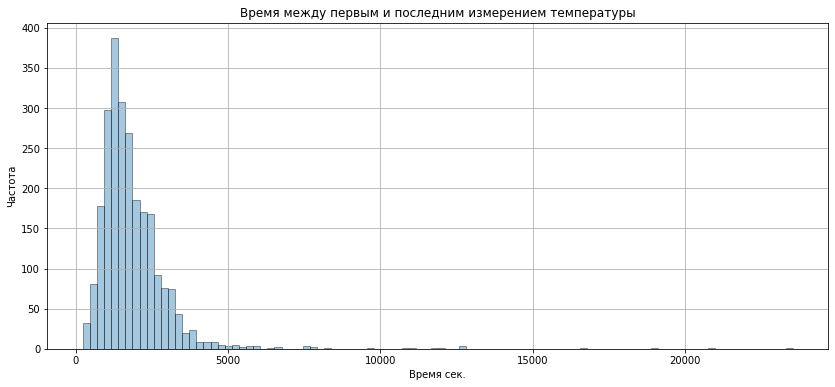

In [51]:
data_temp_by_key['начало-конец измерений'].plot.hist(bins=100, edgecolor = 'black', figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('Время между первым и последним измерением температуры'); 
plt.ylabel('Частота')
plt.xlabel('Время сек.');

Партии с временем обработки более 2 часов вероятно выбросы.

In [52]:
print('0.5% партий с временем обработки более', data_temp_by_key['начало-конец измерений'].quantile(0.995))
print('0.5% партий с временем обработки менее', data_temp_by_key['начало-конец измерений'].quantile(0.005))

0.5% партий с временем обработки более 8033.894999999991
0.5% партий с временем обработки менее 346.485


In [53]:
long_time_list = data_temp_by_key[data_temp_by_key['начало-конец измерений']>8034].index.tolist()
fast_time_list = data_temp_by_key[data_temp_by_key['начало-конец измерений']<346].index.tolist()

In [54]:
print(long_time_list)
print(fast_time_list)

[44, 46, 118, 638, 641, 801, 1513, 1689, 1880, 1881, 1958, 2107, 2108]
[151, 600, 720, 744, 800, 812, 977, 1105, 1116, 1334, 1381, 2254, 2486]


In [55]:
# удаляем пропуски и выбросы, считаем потери
i=0

for df in [data_arc2, data_bulk2, data_bulk_time2, data_gas2, data_temp2, data_wire2, data_wire_time2]:
    df.size_0 = df['key'].unique().size
    df.query('key not in @long_time_list and key not in @fast_time_list', inplace=True)
    df.size_1 = df['key'].unique().size
    loss = df.size_0 - df.size_1
    print('из', df.size_0, 'партий', loss, '({:.1%})'.format(loss/df.size_0), 'удалили в', df_name_list[i])
    i+=1 

из 2472 партий 26 (1.1%) удалили в data_arc2
из 2404 партий 23 (1.0%) удалили в data_bulk2
из 2404 партий 23 (1.0%) удалили в data_bulk_time2
из 2492 партий 26 (1.0%) удалили в data_gas2
из 2472 партий 26 (1.1%) удалили в data_temp2
из 2369 партий 23 (1.0%) удалили в data_wire2
из 2369 партий 23 (1.0%) удалили в data_wire_time2


In [56]:
data_temp_by_key = data_temp_by_key[data_temp_by_key['начало-конец измерений'] <= 8034]
data_temp_by_key = data_temp_by_key[data_temp_by_key['начало-конец измерений'] >= 346]

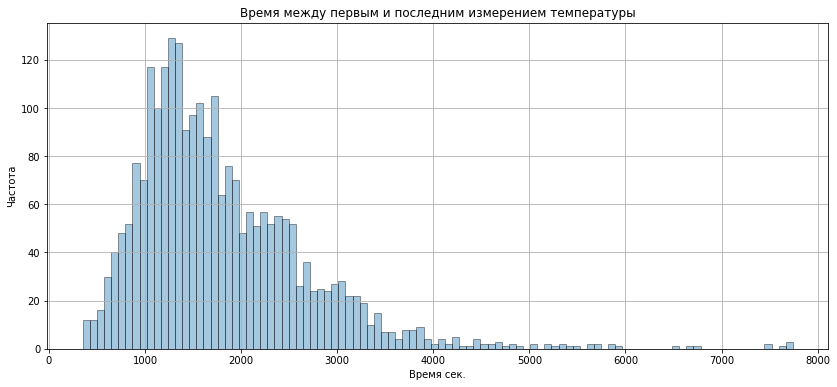

In [57]:
data_temp_by_key['начало-конец измерений'].plot.hist(bins=100, edgecolor = 'black', figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('Время между первым и последним измерением температуры'); 
plt.ylabel('Частота')
plt.xlabel('Время сек.');

In [58]:
data_temp_by_key.describe()

кол-во измерений  температура начальная  температура конечная  \
count       2446.000000            2446.000000           2446.000000   
mean           4.930090            1588.919869           1595.367948   
std            1.710433              24.944669             15.910600   
min            2.000000            1519.000000           1545.000000   
25%            4.000000            1572.000000           1587.000000   
50%            5.000000            1588.000000           1593.000000   
75%            6.000000            1605.000000           1599.000000   
max           14.000000            1679.000000           1700.000000   

       начало-конец измерений  температура предпоследняя  температура средняя  
count             2446.000000                2446.000000          2446.000000  
mean              1798.501226                1592.831153          1590.154357  
std                900.829610                  16.378040            17.249455  
min                351.000000                1549.000000          1544.666667  
25%               1187.000000                1584.000000          1579.750000  
50%               1590.500000                1591.000000          1589.000000  
75%               2257.250000                1598.000000          1598.750000  
max               7743.000000                1705.000000          1677.250000

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

* между 1 и последним замером температуры в партии проходит в среднем около 30 минут. 

<a name="342"></a>
#### Нагревание.

In [59]:
data_arc2['Длительность нагрева']=(
    data_arc2['Конец нагрева дугой']-data_arc2['Начало нагрева дугой']).astype('int64')/1000000000
data_arc2['Полная мощность'] = (data_arc2['Активная мощность']**2 + data_arc2['Реактивная мощность']**2)**0.5
data_arc2['АЭ*t'] = data_arc2['Активная мощность']*data_arc2['Длительность нагрева']
data_arc2['РЭ*t'] = data_arc2['Реактивная мощность']*data_arc2['Длительность нагрева']
data_arc2['Полная энергия'] = data_arc2['Полная мощность']*data_arc2['Длительность нагрева']
data_arc2['Р/А'] = data_arc2['Реактивная мощность']/data_arc2['Активная мощность']
data_arc2['Коэф_мощ'] = data_arc2['Активная мощность']/data_arc2['Полная мощность']

display(data_arc2[100:105])
#data_arc2.info()
#display(data_arc2.describe())

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
100   22  2019-05-04 04:23:37 2019-05-04 04:27:42           0.984584   
101   22  2019-05-04 04:31:36 2019-05-04 04:34:33           0.802886   
102   22  2019-05-04 04:35:27 2019-05-04 04:40:27           1.360374   
103   22  2019-05-04 04:41:53 2019-05-04 04:43:18           0.381265   
104   23  2019-05-04 05:07:02 2019-05-04 05:09:36           0.534532   

     Реактивная мощность  Длительность нагрева  Полная мощность        АЭ*t  \
100             0.701436                 245.0         1.208892  241.223160   
101             0.538929                 177.0         0.966991  142.110876   
102             0.925407                 300.0         1.645295  408.112299   
103             0.243745                  85.0         0.452520   32.407519   
104             0.431621                 154.0         0.687038   82.317934   

           РЭ*t  Полная энергия       Р/А  Коэф_мощ  
100  171.851903      296.178476  0.712419  0.814452  
101   95.390409      171.157329  0.671239  0.830294  
102  277.622044      493.588542  0.680259  0.826827  
103   20.718333       38.464224  0.639306  0.842537  
104   66.469558      105.803802  0.807474  0.778024

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>хорошая идея с новыми факторами. Вопрос только в том - стоит ли их все тянуть в модель - не будет ли мультиколлинеарности. Например все мощности коррелируют между собой? если да - то не стоит их вместе использовать...

In [60]:
# не учтено время первого/последнего измерения температуры
data_arc_by_key = data_arc2.pivot_table(
    index='key', 
#    values=['Активная мощность', 'Реактивная мощность', 'Длительность нагрева', 'Активная энергия', 'Реактивная энергия'], 
    aggfunc={'Активная мощность': ('count', 'mean'),
             'Реактивная мощность': 'mean',
             'Длительность нагрева': 'sum', 
             'Полная мощность': 'mean',
             'АЭ*t': 'sum', 
             'РЭ*t': 'sum',
             'Полная энергия': 'sum',
             'Р/А': 'mean',
             'Коэф_мощ': 'mean',
             'Начало нагрева дугой': 'min',
             'Конец нагрева дугой': 'max'}
    )

In [61]:
data_arc_by_key.head(3)

АЭ*t Активная мощность           Длительность нагрева  \
             sum             count      mean                  sum   
key                                                                 
1    1207.804249                 5  0.975629               1098.0   
2     733.816470                 4  0.763150                811.0   
3     443.583327                 5  0.505176                655.0   

    Конец нагрева дугой  Коэф_мощ Начало нагрева дугой Полная мощность  \
                    max      mean                  min            mean   
key                                                                      
1   2019-05-03 11:28:37  0.837756  2019-05-03 11:02:14        1.165279   
2   2019-05-03 11:53:18  0.840158  2019-05-03 11:34:14        0.912304   
3   2019-05-03 12:32:19  0.845421  2019-05-03 12:06:54        0.597907   

    Полная энергия       Р/А        РЭ*t Реактивная мощность  
               sum      mean         sum                mean  
key                                                           
1      1442.377754  0.651695  787.907510            0.636648  
2       881.233565  0.645465  487.590677            0.499528  
3       525.066777  0.631751  280.936835            0.319815

In [62]:
data_arc_by_key.columns = data_arc_by_key.columns.droplevel()
data_arc_by_key.index.name = None
data_arc_by_key.set_axis(['АЭ*t_сум', 'кол-во нагревов', 'средняя мощность_а', 'длительность нагрева',
                          'время окончания', 'Коэф_мощ', 'время начала', 'средняя мощность_п', 'энергия_п', 
                          'Р/А_сред', 'РЭ*t_сум', 'средняя мощность_р'], axis='columns', inplace=True)


In [63]:
# время между началом первого нагрева и концом последнего
data_arc_by_key['начало-конец нагрева'] = (
    data_arc_by_key['время окончания'] - data_arc_by_key['время начала']).astype('int64')/1000000000
#data_arc_by_key = data_arc_by_key.drop(['время окончания', 'время начала'], axis=1)

In [64]:
data_arc_by_key = data_arc_by_key.drop(['время окончания', 'время начала'], axis=1)

In [65]:
data_arc_by_key.head(3)

АЭ*t_сум  кол-во нагревов  средняя мощность_а  длительность нагрева  \
1  1207.804249                5            0.975629                1098.0   
2   733.816470                4            0.763150                 811.0   
3   443.583327                5            0.505176                 655.0   

   Коэф_мощ  средняя мощность_п    энергия_п  Р/А_сред    РЭ*t_сум  \
1  0.837756            1.165279  1442.377754  0.651695  787.907510   
2  0.840158            0.912304   881.233565  0.645465  487.590677   
3  0.845421            0.597907   525.066777  0.631751  280.936835   

   средняя мощность_р  начало-конец нагрева  
1            0.636648                1583.0  
2            0.499528                1144.0  
3            0.319815                1525.0

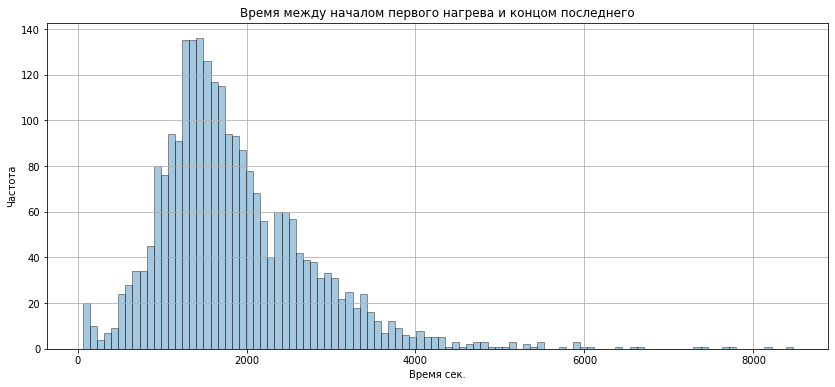

In [66]:
data_arc_by_key['начало-конец нагрева'].plot.hist(bins=100, edgecolor = 'black', figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('Время между началом первого нагрева и концом последнего'); 
plt.ylabel('Частота')
plt.xlabel('Время сек.');

In [67]:
data_arc_by_key.describe()

АЭ*t_сум  кол-во нагревов  средняя мощность_а  длительность нагрева  \
count  2446.000000      2446.000000         2446.000000           2446.000000   
mean    713.632722         4.603434            0.674399            794.775961   
std     488.160408         1.529710            0.204298            321.147212   
min      12.193819         1.000000            0.187837             61.000000   
25%     366.356107         4.000000            0.526212            573.000000   
50%     609.820525         4.000000            0.651029            772.000000   
75%     931.138540         6.000000            0.801282            983.750000   
max    4114.814680        13.000000            1.819169           2658.000000   

          Коэф_мощ  средняя мощность_п    энергия_п     Р/А_сред     РЭ*t_сум  \
count  2446.000000         2446.000000  2446.000000  2446.000000  2446.000000   
mean      0.801447            0.842887   893.116371     0.747663   533.741026   
std       0.031912            0.250622   607.735386     0.088809   364.342396   
min       0.552784            0.228541    16.488778     0.568125    10.127814   
25%       0.790117            0.660460   461.408080     0.696850   274.509911   
50%       0.806849            0.819562   767.279131     0.732328   457.555171   
75%       0.820457            0.997856  1165.587740     0.776129   694.357291   
max       0.869155            2.147979  5123.890430     1.552491  3045.174869   

       средняя мощность_р  начало-конец нагрева  
count         2446.000000           2446.000000  
mean             0.502642           1860.628373  
std              0.151196            927.888506  
min              0.130062             61.000000  
25%              0.392797           1268.000000  
50%              0.490537           1674.000000  
75%              0.598134           2328.250000  
max              1.141721           8467.000000

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

* за партию между началом первого нагрева и окончанием последнего проходит около 30 минут. 

<a name="343"></a>
#### Добавление сыпучих и проволочных материалов.

In [68]:
# суммарный объем сыпучих матриалов
data_bulk2['Bulk_sum'] = data_bulk2[bulk_col_list].sum(axis=1)

In [69]:
# суммарный объем проволочных матриалов
data_wire2['Wire_sum'] = data_wire2[wire_col_list].sum(axis=1)

In [70]:
data_arc_by_key

АЭ*t_сум  кол-во нагревов  средняя мощность_а  длительность нагрева  \
1     1207.804249                5            0.975629                1098.0   
2      733.816470                4            0.763150                 811.0   
3      443.583327                5            0.505176                 655.0   
4      670.663327                4            0.802313                 741.0   
5      997.496095                4            0.836793                 869.0   
...           ...              ...                 ...                   ...   
2495   626.167357                4            0.802673                 723.0   
2496   727.868032                6            0.700511                 940.0   
2497   427.535518                3            0.737460                 569.0   
2498   629.928649                5            0.681745                 750.0   
2499  1075.132183                4            1.024608                 883.0   

      Коэф_мощ  средняя мощность_п    энергия_п  Р/А_сред    РЭ*t_сум  \
1     0.837756            1.165279  1442.377754  0.651695  787.907510   
2     0.840158            0.912304   881.233565  0.645465  487.590677   
3     0.845421            0.597907   525.066777  0.631751  280.936835   
4     0.841682            0.953741   796.911309  0.641443  429.935932   
5     0.828104            1.008939  1199.137958  0.676904  664.940090   
...        ...                 ...          ...       ...         ...   
2495  0.807313            0.996717   778.818234  0.731065  462.572488   
2496  0.829826            0.842839   875.261419  0.672407  485.842067   
2497  0.765895            0.961672   556.930349  0.839576  356.837023   
2498  0.826522            0.828750   767.817794  0.681031  438.905595   
2499  0.828846            1.238253  1301.828445  0.674963  733.110945   

      средняя мощность_р  начало-конец нагрева  
1               0.636648                1583.0  
2               0.499528                1144.0  
3               0.319815                1525.0  
4               0.515074                1093.0  
5               0.563161                1362.0  
...                  ...                   ...  
2495            0.590194                1208.0  
2496            0.468364                1406.0  
2497            0.617090                 764.0  
2498            0.471086                1358.0  
2499            0.694466                1366.0  

[2446 rows x 11 columns]

<div class="alert alert-block alert-info">
<b>Вывод по созданным признакам:</b>  
</div>
На основании имеющихся данных сформированы следующие признаки:

* data_arc_by_key - АЭ*t_сум (сумма произведений активной энергии на время), количество нагревов, активная мощность (средняя), длительность нагрева (суммарная), коэффициент мощности, полная мощность (средняя), энергия полная, Р/А_сред (отношение реактивной энергии к активной), РЭ*t_сум (сумма произведений реактивной энергии на время), реактивная мощность  (средняя), энергия реактивной мощности, суммарная длительность циклов нагрев/охлаждение


* data_temp_by_key - кол-во измерений (температуры), температура начальная, температура конечная, начало-конец измерений, температура предпоследняя, температура средняя (не включая последнюю).


* data_bulk2 - суммарный объем сыпучих матриалов


* data_wire2 - суммарный объем проволочных матриалов

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>классная работа по разделу. С мультиколлинеарностью бы ещё посмотреть)

<a name="4"></a>
## Исследовательский анализ данных.

<a name="41"></a>
### Температура.

<a name="411"></a>
#### Начальные данные

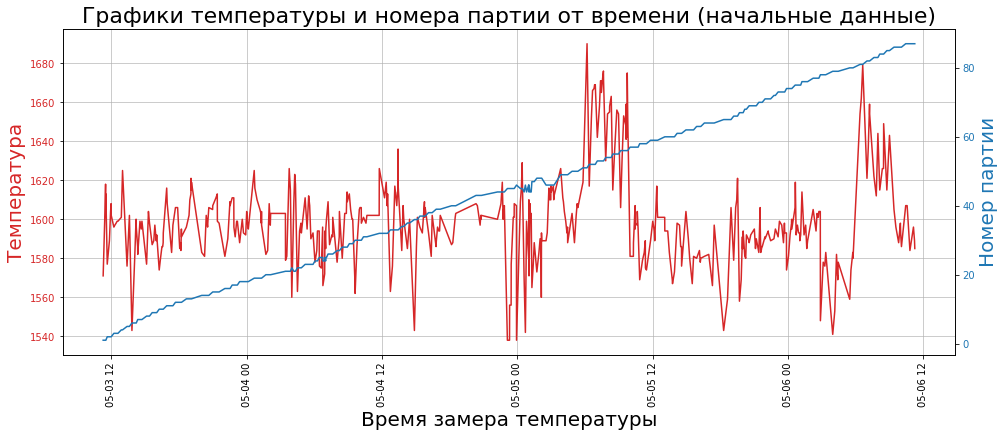

In [71]:
data_temp3 = data_temp.copy()
data_temp3['Время замера'] = data_temp3['Время замера'].astype('datetime64')
data_temp3.index = data_temp3['Время замера']
data_temp3.sort_index(inplace=True)

x = data_temp3[0:500]['Время замера']
y1 = data_temp3[0:500]['Температура']
y2 = data_temp3[0:500]['key']

# температура
fig, ax1 = plt.subplots(1,1,figsize=(16,6)) #dpi= 80
ax1.plot(x, y1, color='tab:red')

ax1.set_xlabel('Время замера температуры', fontsize=20)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Температура', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.8)

# номер партии
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')

ax2.set_ylabel("Номер партии", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Графики температуры и номера партии от времени (начальные данные)", fontsize=22)
plt.show();

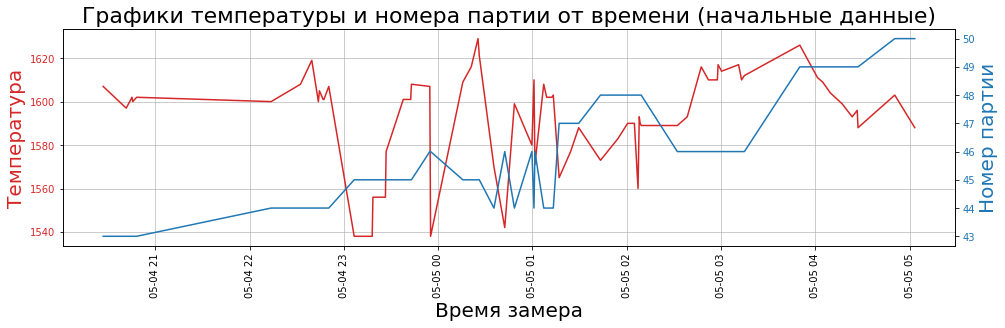

In [72]:
x = data_temp3[220:290]['Время замера']
y1 = data_temp3[220:290]['Температура']
y2 = data_temp3[220:290]['key']

# температура
fig, ax1 = plt.subplots(1,1,figsize=(16,4)) #dpi= 80
ax1.plot(x, y1, color='tab:red')

ax1.set_xlabel('Время замера', fontsize=20)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Температура', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.8)

# номер партии
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')

ax2.set_ylabel("Номер партии", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Графики температуры и номера партии от времени (начальные данные)", fontsize=22)
plt.show();

<a name="412"></a>
#### Измененные данные

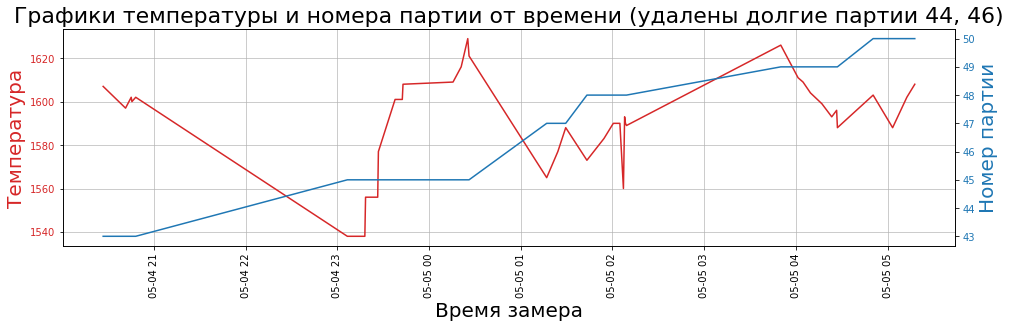

In [73]:
data_temp4 = data_temp2.copy()
data_temp4['Время замера'] = data_temp4['Время замера'].astype('datetime64')
data_temp4.index = data_temp4['Время замера']
data_temp4.sort_index(inplace=True)


x = data_temp4[220:260]['Время замера']
y1 = data_temp4[220:260]['Температура']
y2 = data_temp4[220:260]['key']

# температура
fig, ax1 = plt.subplots(1,1,figsize=(16,4)) #dpi= 80
ax1.plot(x, y1, color='tab:red')

ax1.set_xlabel('Время замера', fontsize=20)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Температура', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.8)

# номер партии
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')

ax2.set_ylabel("Номер партии", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Графики температуры и номера партии от времени (удалены долгие партии 44, 46)", fontsize=22)
plt.show();

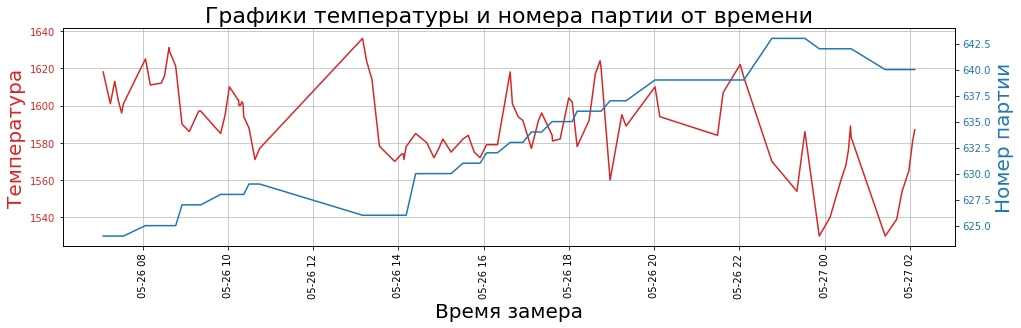

In [74]:
x = data_temp4[3120:3220]['Время замера']
y1 = data_temp4[3120:3220]['Температура']
y2 = data_temp4[3120:3220]['key']

# температура
fig, ax1 = plt.subplots(1,1,figsize=(16,4)) #dpi= 80
ax1.plot(x, y1, color='tab:red')

ax1.set_xlabel('Время замера', fontsize=20)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Температура', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.8)

# номер партии
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue')

ax2.set_ylabel("Номер партии", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Графики температуры и номера партии от времени", fontsize=22)
plt.show();

In [75]:
#data_temp4[3125:3175]

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

* в данных data_temp есть непоследовательные измерения температуры разных партий. Часть не попадут в конечный набор данных из-за большого времени обработки (удалены по 0,5% самых долгих и самых быстрых партий). Возможно связано с одновременным изготовлением нескольких партий (разные ковши?) Или непоследовательном (в некоторых случаях) присвоением партии номера. Посмотрим на поведение моделей.

In [76]:
data_temp_by_key['кол-во измерений'].nunique()

13

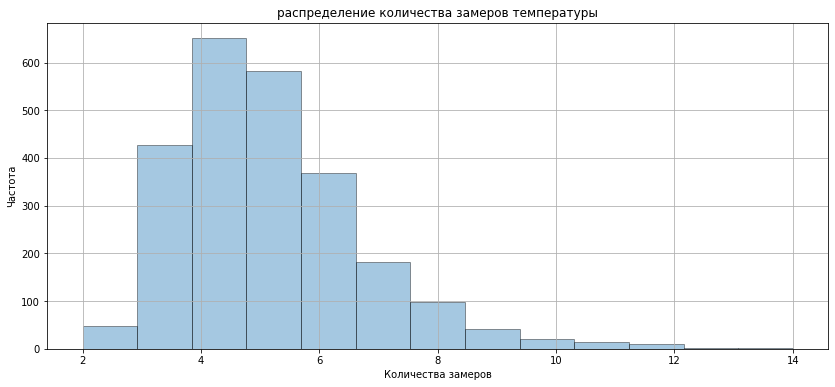

In [77]:
data_temp_by_key['кол-во измерений'].plot.hist(bins=13, edgecolor = 'black', figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('распределение количества замеров температуры') 
plt.ylabel('Частота')
plt.xlabel('Количества замеров');

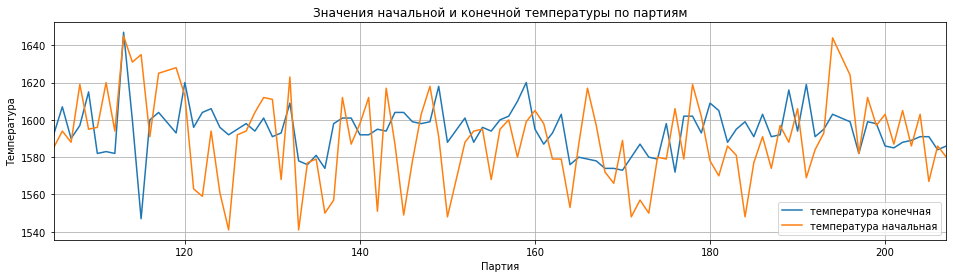

In [78]:
data_temp_by_key[100:200].plot(y=['температура конечная', 'температура начальная'], figsize=(16, 4), grid=True)
plt.title("Значения начальной и конечной температуры по партиям")
plt.xlabel("Партия")
plt.ylabel("Температура")
plt.show();

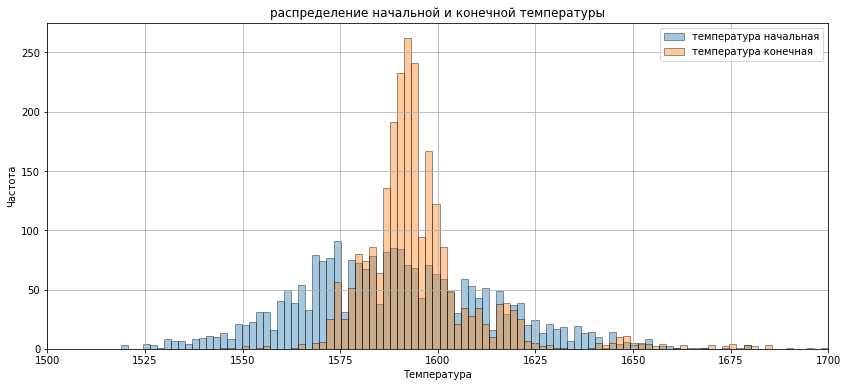

In [79]:
data_temp_by_key[['температура начальная', 'температура конечная']].plot.hist(bins=100, edgecolor = 'black', 
                                                                              figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('распределение начальной и конечной температуры') 
plt.ylabel('Частота')
plt.xlabel('Температура')
plt.xlim([1500, 1700]);

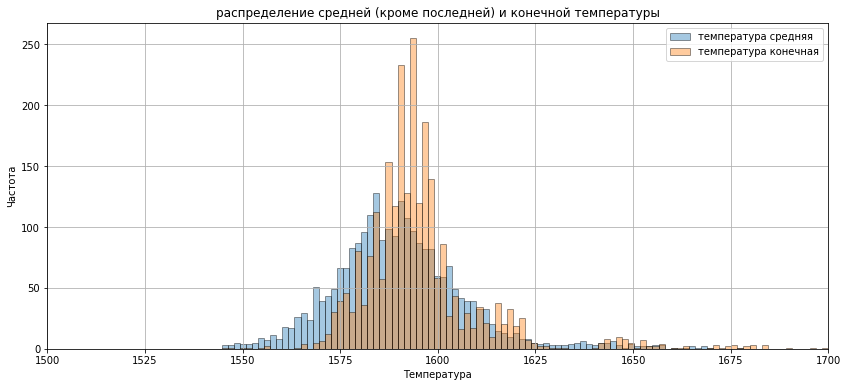

In [80]:
data_temp_by_key[['температура средняя', 'температура конечная']].plot.hist(bins=100, edgecolor = 'black', 
                                                                            figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('распределение средней (кроме последней) и конечной температуры') 
plt.ylabel('Частота')
plt.xlabel('Температура')
plt.xlim([1500, 1700]);

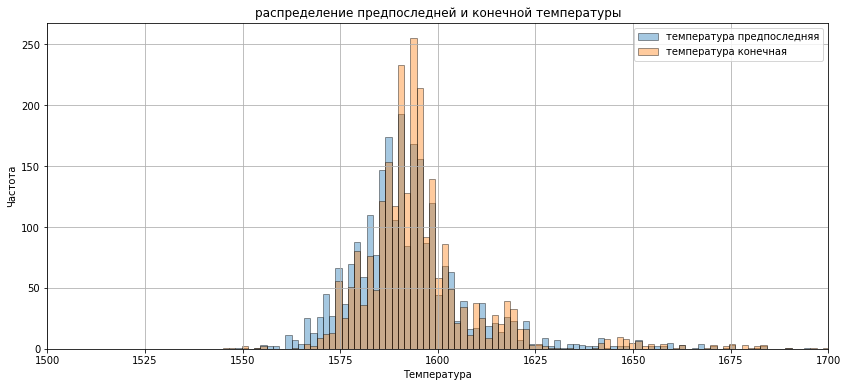

In [81]:
data_temp_by_key[['температура предпоследняя', 'температура конечная']].plot.hist(bins=100, edgecolor = 'black',
                                                                                  figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('распределение предпоследней и конечной температуры') 
plt.ylabel('Частота')
plt.xlabel('Температура')
plt.xlim([1500, 1700]);

In [82]:
data_temp_by_key.describe()

кол-во измерений  температура начальная  температура конечная  \
count       2446.000000            2446.000000           2446.000000   
mean           4.930090            1588.919869           1595.367948   
std            1.710433              24.944669             15.910600   
min            2.000000            1519.000000           1545.000000   
25%            4.000000            1572.000000           1587.000000   
50%            5.000000            1588.000000           1593.000000   
75%            6.000000            1605.000000           1599.000000   
max           14.000000            1679.000000           1700.000000   

       начало-конец измерений  температура предпоследняя  температура средняя  
count             2446.000000                2446.000000          2446.000000  
mean              1798.501226                1592.831153          1590.154357  
std                900.829610                  16.378040            17.249455  
min                351.000000                1549.000000          1544.666667  
25%               1187.000000                1584.000000          1579.750000  
50%               1590.500000                1591.000000          1589.000000  
75%               2257.250000                1598.000000          1598.750000  
max               7743.000000                1705.000000          1677.250000

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>
Температура в конце обработки в среднем на 5 градусов выше начальной температуры, но простой зависимости нет. Конечная температура разбросана меньше.

Наиболее близкое к распределению конечной температуры распределение предпоследней температуры.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ИНТЕРЕСНЫЙ взгляд на ситуацию!

<a name="42"></a>
### Нагревание.

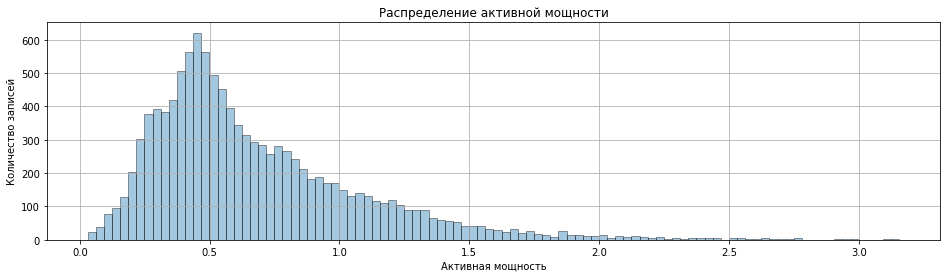

In [83]:
data_arc2['Активная мощность'].plot.hist(bins=100, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение активной мощности'); 
plt.ylabel('Количество записей')
plt.xlabel('Активная мощность');

Нормальное распределение с правым хвостом, оснований считать высокие значения выбросами нет.

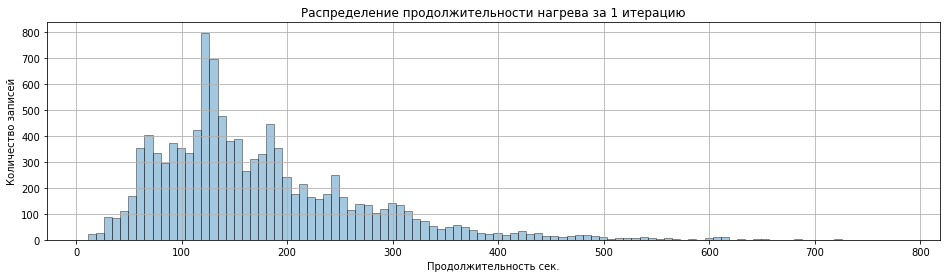

In [84]:
data_arc2['Длительность нагрева'].plot.hist(bins=100, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение продолжительности нагрева за 1 итерацию'); 
plt.ylabel('Количество записей')
plt.xlabel('Продолжительность сек.');

Близко к нормальному с правым хвостом. Пики в районе 60, 120, 180 ... сек (1, 2 , 3 ... мин.). Оснований считать высокие значения выбросами нет.

In [85]:
data_arc_by_key.head(3)

АЭ*t_сум  кол-во нагревов  средняя мощность_а  длительность нагрева  \
1  1207.804249                5            0.975629                1098.0   
2   733.816470                4            0.763150                 811.0   
3   443.583327                5            0.505176                 655.0   

   Коэф_мощ  средняя мощность_п    энергия_п  Р/А_сред    РЭ*t_сум  \
1  0.837756            1.165279  1442.377754  0.651695  787.907510   
2  0.840158            0.912304   881.233565  0.645465  487.590677   
3  0.845421            0.597907   525.066777  0.631751  280.936835   

   средняя мощность_р  начало-конец нагрева  
1            0.636648                1583.0  
2            0.499528                1144.0  
3            0.319815                1525.0

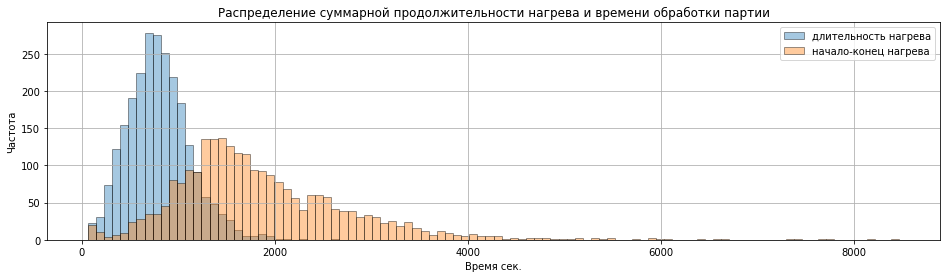

In [86]:
data_arc_by_key[['длительность нагрева', 'начало-конец нагрева']].plot.hist(bins=100, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение суммарной продолжительности нагрева и времени обработки партии'); 
plt.ylabel('Частота')
plt.xlabel('Время сек.');

In [87]:
#data_arc_by_key[['энергия_п', 'энергия_а', 'энергия_р']].plot.hist(bins=100, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
#plt.title('Распределение энергии по партиям'); 
#plt.ylabel('Частота')
#plt.xlabel('Энергия');

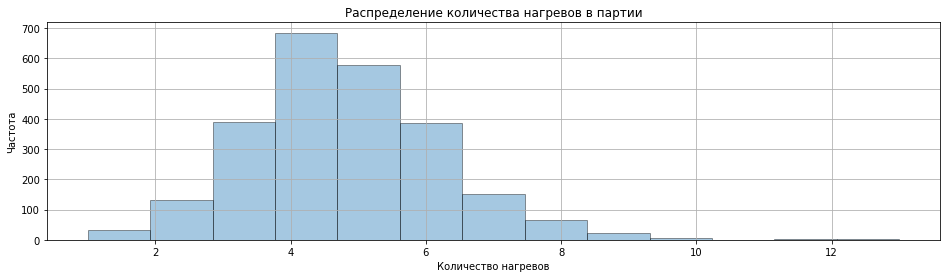

In [88]:
data_arc_by_key['кол-во нагревов'].plot.hist(bins=13, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение количества нагревов в партии'); 
plt.ylabel('Частота')
plt.xlabel('Количество нагревов');

<a name="43"></a>
### Добавление сыпучих и проволочных материалов, продувка.

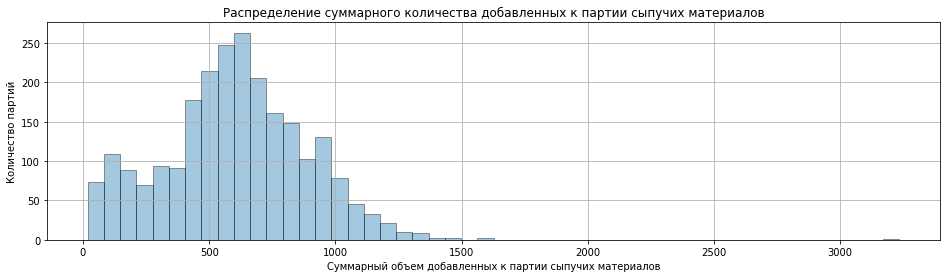

In [89]:
data_bulk2['Bulk_sum'].plot.hist(bins=50, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение суммарного количества добавленных к партии сыпучих материалов'); 
plt.ylabel('Количество партий')
plt.xlabel('Суммарный объем добавленных к партии сыпучих материалов');

In [90]:
display(data_bulk2[data_bulk2['Bulk_sum']>1600])
display(data_bulk2[data_bulk2['Bulk 12']>900])
#display(data_arc2[data_arc2['key']==303])
#display(data_temp2[data_temp2['key']==303])

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 9  \
303  322   185.0     0.0   101.0    58.0     0.0     0.0   406.0     0.0   

     Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  Bulk_sum  
303      0.0      0.0   1849.0      0.0    636.0      0.0    3235.0

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 9  \
303  322   185.0     0.0   101.0    58.0     0.0     0.0   406.0     0.0   

     Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  Bulk_sum  
303      0.0      0.0   1849.0      0.0    636.0      0.0    3235.0

Близко к нормальному с правым хвостом. Выделяется центральный пик, а также 2 малых - вероятно связано с изготовлением различных марок стали.

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

*  Подозрительно высокое значение подачи сыпучих материалов (Bulk 12 и Bulk_sum) в партии 303. Вероятно необходимо удалить.

In [91]:
# удаляем 303 партию
for df in [data_arc2, data_bulk2, data_bulk_time2, data_gas2, data_temp2, data_wire2, data_wire_time2]:
    df.query('key != 303', inplace=True)

data_temp_by_key = data_temp_by_key[data_temp_by_key.index != 303]
data_arc_by_key = data_arc_by_key[data_arc_by_key.index != 303]

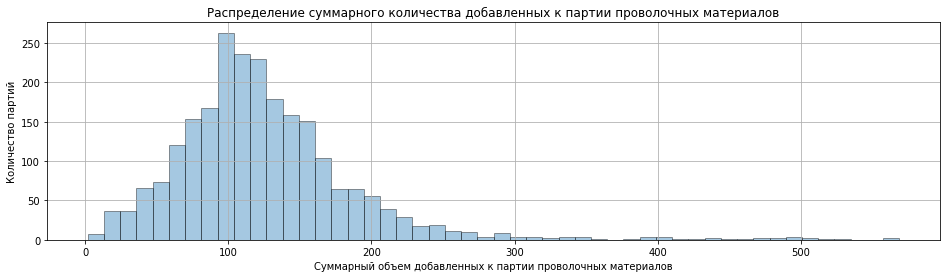

In [92]:
data_wire2['Wire_sum'].plot.hist(bins=50, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение суммарного количества добавленных к партии проволочных материалов'); 
plt.ylabel('Количество партий')
plt.xlabel('Суммарный объем добавленных к партии проволочных материалов');

Нормальное распределение с правым хвостом. Оснований считать высокие значения выбросами нет.

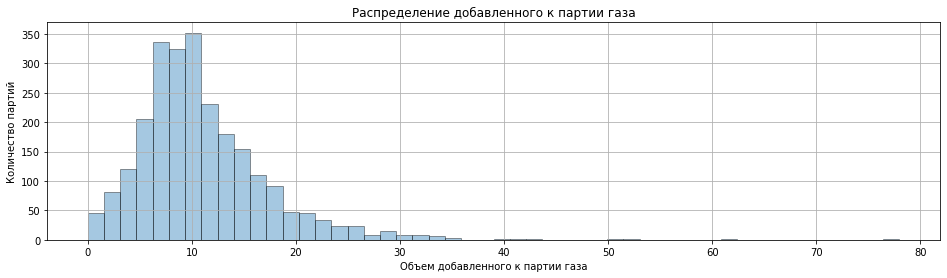

In [93]:
data_gas2['Газ 1'].plot.hist(bins=50, edgecolor = 'black', figsize=(16, 4), grid=True, alpha = 0.4)
plt.title('Распределение добавленного к партии газа'); 
plt.ylabel('Количество партий')
plt.xlabel('Объем добавленного к партии газа');

Нормальное распределение с правым хвостом. Оснований считать высокие значения выбросами нет.

<div class="alert alert-block alert-info">
<b>Вывод:</b>  
</div>
* в данных о температуре есть непоследовательные измерения температуры разных партий. Возможно связано с одновременным изготовлением нескольких партий (разные ковши?) Или непоследовательном (в некоторых случаях) присвоением партии номера. Возможно стоит удалить все такие партии (включая соседей).

* В признаках встречаются "экстремальные" значения. При низких значениях MAE стоит дополнительно поискать выбросы.


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>👍👍👍

<a name="5"></a>
## Подготовка к обучению.

<a name="51"></a>
### Объединение таблиц.

In [94]:
for df in [data_bulk2, data_gas2, data_wire2]:
    df.set_index('key', inplace=True)
    df.index.name = None

In [95]:
len(data_temp_by_key.index)

2445

In [96]:
# данные о температуре и нагреве соединяем 'inner'
data = data_temp_by_key.join(data_arc_by_key, how='inner')
print(len(data.index))

2445


In [97]:
# все остальные 'left'
data = data.join(data_gas2, how='left').join(data_bulk2, how='left').join(data_wire2, how='left')

In [98]:
#data[data['Газ 1'] != data['Газ 1']].T

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

* Для строк с пропусками в данных о подаче газа (всего 2) остальные значения есть - можно заполнить нулями.
* Судя по распределению суммарного количества добавленных к партии сыпучих материалов, нулевые и околонулевые значения это нормально - заменяю нулями
* Ноль для проволочных материалов - необычно - удаляю.


In [99]:
data.dropna(subset = ['Wire_sum'], inplace = True)
data.fillna(0, inplace=True)
print(len(data.index))
data.describe().T

2345


count         mean         std          min  \
кол-во измерений           2345.0     4.943284    1.697652     2.000000   
температура начальная      2345.0  1587.445203   23.630305  1519.000000   
температура конечная       2345.0  1593.358635   11.062100  1545.000000   
начало-конец измерений     2345.0  1825.779531  903.652641   351.000000   
температура предпоследняя  2345.0  1590.976972   12.422606  1549.000000   
температура средняя        2345.0  1588.442897   14.330114  1544.666667   
АЭ*t_сум                   2345.0   702.598513  481.014455    12.193819   
кол-во нагревов            2345.0     4.641791    1.534460     1.000000   
средняя мощность_а         2345.0     0.665100    0.196850     0.187837   
длительность нагрева       2345.0   794.490832  322.809909    61.000000   
Коэф_мощ                   2345.0     0.801258    0.032199     0.552784   
средняя мощность_п         2345.0     0.831773    0.242178     0.228541   
энергия_п                  2345.0   880.039013  599.891360    16.488778   
Р/А_сред                   2345.0     0.748196    0.089677     0.568125   
РЭ*t_сум                   2345.0   526.608493  360.756992    10.127814   
средняя мощность_р         2345.0     0.496477    0.147185     0.130062   
начало-конец нагрева       2345.0  1885.836247  933.191394    61.000000   
Газ 1                      2345.0    11.224789    6.227980     0.000000   
Bulk 1                     2345.0     3.315565   12.193206     0.000000   
Bulk 2                     2345.0     1.079744   16.595083     0.000000   
Bulk 3                     2345.0    46.570149   74.958250     0.000000   
Bulk 4                     2345.0    36.905757   58.591423     0.000000   
Bulk 5                     2345.0     2.484435   21.986030     0.000000   
Bulk 6                     2345.0    21.785501   54.789346     0.000000   
Bulk 7                     2345.0     1.607676   27.582540     0.000000   
Bulk 9                     2345.0     0.379104    5.409825     0.000000   
Bulk 10                    2345.0     5.018337   20.850437     0.000000   
Bulk 11                    2345.0     4.069083   21.974454     0.000000   
Bulk 12                    2345.0   204.839659  157.660817     0.000000   
Bulk 13                    2345.0     0.799147   11.914521     0.000000   
Bulk 14                    2345.0   151.351386   82.496324     0.000000   
Bulk 15                    2345.0   118.033262   85.336784     0.000000   
Bulk_sum                   2345.0   598.238806  293.940949     0.000000   
Wire 1                     2345.0   102.463336   43.363427     0.000000   
Wire 2                     2345.0    17.873721   33.937132     0.000000   
Wire 3                     2345.0     3.092447   27.659448     0.000000   
Wire 4                     2345.0     0.215800    3.940012     0.000000   
Wire 6                     2345.0     0.877348    8.234486     0.000000   
Wire 7                     2345.0     0.002247    0.104095     0.000000   
Wire 8                     2345.0     0.279978    4.155467     0.000000   
Wire 9                     2345.0     0.419089    4.356325     0.000000   
Wire_sum                   2345.0   125.223967   63.756188     1.918800   

                                   25%          50%          75%          max  
кол-во измерений              4.000000     5.000000     6.000000    14.000000  
температура начальная      1571.000000  1587.000000  1603.000000  1673.000000  
температура конечная       1587.000000  1593.000000  1598.000000  1653.000000  
начало-конец измерений     1209.000000  1624.000000  2273.000000  7743.000000  
температура предпоследняя  1583.000000  1590.000000  1597.000000  1662.000000  
температура средняя        1579.250000  1588.333333  1597.600000  1643.666667  
АЭ*t_сум                    359.253272   599.744670   920.079788  4114.814680  
кол-во нагревов               4.000000     5.000000     6.000000    13.000000  
средняя мощность_а            0.521743     0.640063     0.788747     1.421416  
дл

In [100]:
#data[data.isnull().any(1)]

<div class="alert alert-block alert-info">
<b>Промежуточный вывод:</b>  
</div>

* В конечной таблице 2345 партий из 3081-3239 партий в начальных таблицах. Потери составили 23,9-27,6% партий.

<a name="52"></a>
### Выявление корреляции.

In [101]:
def get_red_pair(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_largest_correlations(df, n=30):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_red_pair(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

corr = get_largest_correlations(data)
print(corr)

Коэф_мощ                   Р/А_сред                     0.997151
АЭ*t_сум                   энергия_п                    0.996606
энергия_п                  РЭ*t_сум                     0.991827
Bulk 9                     Wire 8                       0.990009
средняя мощность_а         средняя мощность_п           0.988475
АЭ*t_сум                   РЭ*t_сум                     0.978096
средняя мощность_п         средняя мощность_р           0.970620
начало-конец измерений     начало-конец нагрева         0.930875
средняя мощность_а         средняя мощность_р           0.923393
длительность нагрева       энергия_п                    0.895144
                           РЭ*t_сум                     0.891617
АЭ*t_сум                   длительность нагрева         0.889518
Bulk 12                    Bulk_sum                     0.872176
температура начальная      температура средняя          0.863434
температура конечная       температура предпоследняя    0.850380
кол-во нагревов          

In [102]:
data.corr()['температура конечная'].sort_values(ascending=False)

температура конечная         1.000000
температура предпоследняя    0.850380
температура средняя          0.611316
Wire 1                       0.318135
температура начальная        0.314280
АЭ*t_сум                     0.305639
длительность нагрева         0.301283
энергия_п                    0.296324
РЭ*t_сум                     0.278202
Bulk 12                      0.265775
Bulk 15                      0.264362
Bulk_sum                     0.229944
начало-конец нагрева         0.214186
средняя мощность_а           0.210872
кол-во нагревов              0.204616
начало-конец измерений       0.198681
Bulk 4                       0.197153
средняя мощность_п           0.190873
Коэф_мощ                     0.160465
средняя мощность_р           0.149972
кол-во измерений             0.120985
Bulk 14                      0.106819
Газ 1                        0.082951
Wire_sum                     0.074016
Bulk 10                      0.062042
Wire 8                      -0.002298
Bulk 9      

<font color='orange' style='font-size:16px; font-weight:bold'> Начало добавленного участка </font>

<div class="alert alert-block alert-info">
<b>Комментарий:</b> Из пар мультиколлинеарных признаков при формировании features_train удалим наименее коррелирующие с целевым:  
    
*  'Р/А_сред', 'энергия_п', 'РЭ*t_сум', 'средняя мощность_п', 'средняя мощность_р', Bulk 9', 'Bulk_sum'
</div>

<font color='orange' style='font-size:16px; font-weight:bold'> Конец добавленного участка </font>

In [103]:
#data_col_list = data.columns.tolist()

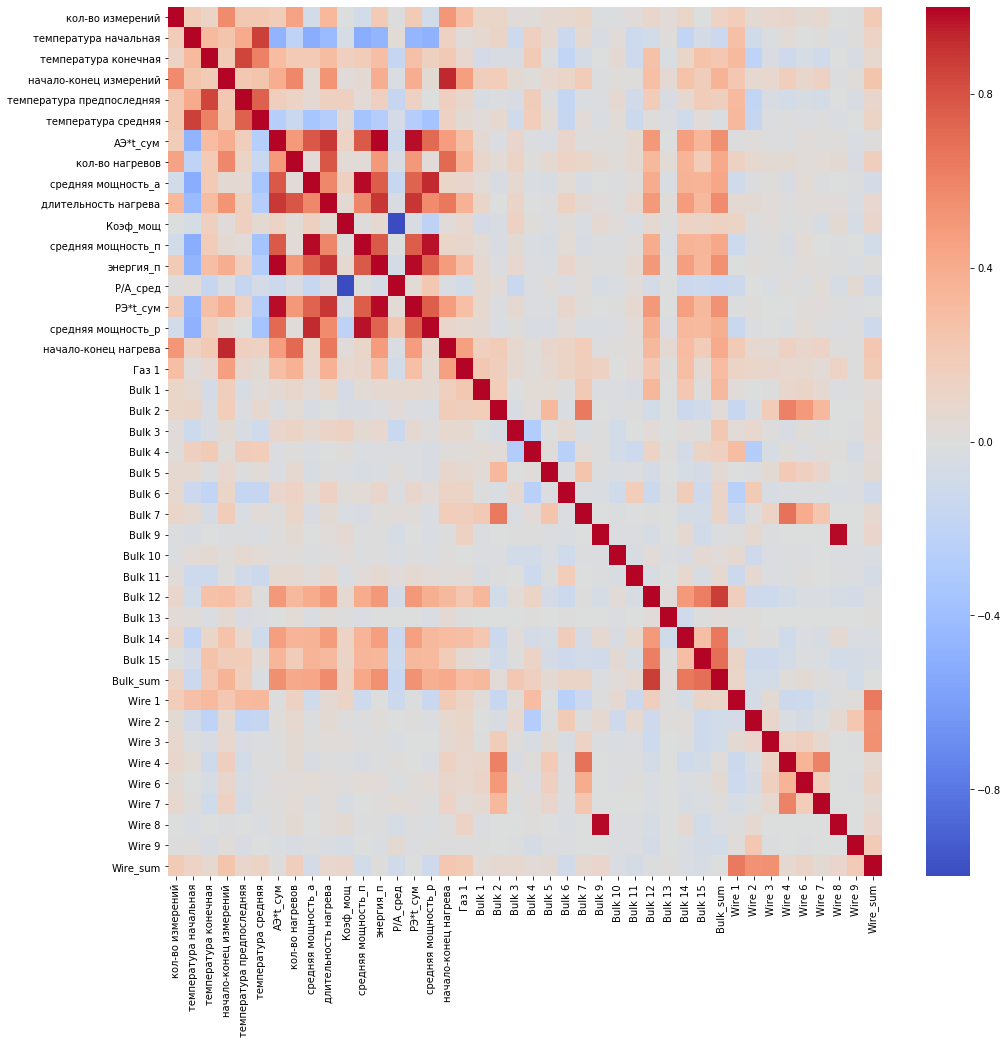

In [104]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data.corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

<div class="alert alert-block alert-info">
<b>Вывод:</b>  
</div>

* Для некоторых созданных признаков значения корреляции почти 1.

* Конечная температура очень хорошо коррелирует с предпоследней 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>воооот, мультиколлинеарность)

<a name="6"></a>
## Обучение и проверка моделей.

<a name="61"></a>
### Подготовка к обучению

In [105]:
#data.columns.tolist()

In [106]:
new_col_axis = ['temp_count',
 'temp_first',
 'temp_last',
 'temp_time_dif',
 'temp_second_to_last',
 'temp_mean',
 'ActiveE*t_sum',
 'heat_count',
 'heat_pow_active',
 'heat_up_time',
 'heat_pow_ratio',
 'heat_pow_full_mean',
 'heat_E_full',
 'react_act_ratio_mean',
 'ReactE*t_sum',
 'heat_pow_react_mean',
 'heat_time_full',
 'gas_1',
 'Bulk_1',
 'Bulk_2',
 'Bulk_3',
 'Bulk_4',
 'Bulk_5',
 'Bulk_6',
 'Bulk_7',
 'Bulk_9',
 'Bulk_10',
 'Bulk_11',
 'Bulk_12',
 'Bulk_13',
 'Bulk_14',
 'Bulk_15',
 'Bulk_sum',
 'Wire_1',
 'Wire_2',
 'Wire_3',
 'Wire_4',
 'Wire_6',
 'Wire_7',
 'Wire_8',
 'Wire_9',
 'Wire_sum']

In [107]:
# мультиколлинеарные признаки
# 'react_act_ratio_mean', 'heat_E_full', 'ReactE*t_sum', 'heat_pow_full_mean', 'heat_pow_react_mean', 'Bulk_9', 'Bulk_sum'

In [108]:
data.set_axis(new_col_axis, axis='columns', inplace=True)

In [109]:
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

In [110]:
data.loc[data.loc[:, 'temp_count'] > 12] = 12
#data['кол-во измерений'].value_counts()

In [111]:
# Поменяем значения 2 редких значения 'кол-во измерений' (13 и 14) на 12 чтобы иметь возможность stratify=data['temp_count']
#data.loc[data.loc[:, 'temp_count'] > 12] = 12
#data['temp_count'].value_counts()

<font color='orange' style='font-size:16px; font-weight:bold'> добавлены списки 
    
* feat_first_temp_drop - исключены зависимые признаки
    
* feat_20 - количество признаков дополнительно уменьшено до 20 наиболее значимых </font>

In [112]:
# списки признаков

# полный
feat_full = data.columns.tolist()
feat_full.remove('temp_last')

# только первое измерение температуры
feat_first_temp = feat_full.copy()
for col in ['temp_second_to_last', 'temp_mean', 'temp_count']:
    feat_first_temp.remove(col)

# дополнительно исключены зависимые признаки
feat_first_temp_drop = feat_first_temp.copy()
for col in ['react_act_ratio_mean', 'heat_E_full', 'ReactE*t_sum', 'heat_pow_full_mean', 
            'heat_pow_react_mean', 'Bulk_9', 'Bulk_sum']:
    feat_first_temp_drop.remove(col)

# количество признаков дополнительно уменьшено до 20 наиболее значимых
feat_20 = feat_first_temp_drop.copy()
for col in ['Bulk_1', 'Bulk_3', 'Bulk_4', 'Bulk_5', 'Bulk_6', 'Bulk_10', 'Bulk_11', 'Bulk_12', 'Bulk_14', 
            'Bulk_15', 'Wire_2', 'Wire_3', 'Wire_4', 'Wire_8', 'gas_1']:
    feat_20.remove(col)

# полностью отсутствуют данные об измерении температуры
feat_no_temp = data.columns.tolist()
for col in ['temp_last', 'temp_first', 'temp_second_to_last', 'temp_mean', 'temp_time_dif', 'temp_count']:
    feat_no_temp.remove(col)

# список наборов признаков
feat_list = [feat_full, feat_first_temp, feat_first_temp_drop, feat_20, feat_no_temp]
feat_name_list = ['feat_full', 'feat_first_temp', 'feat_first_temp_drop', 'feat_20', 'feat_no_temp']

target = ['temp_last']

In [113]:
# разбиваем на train/test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=123)

<div class="alert alert-block alert-info">
<b>Комментарий:</b>  
</div>

Создано 5 наборов признаков:

* feat_full - включает в себя данные о промежуточных измерениях температуры в партии

* feat_first_temp - включает в себя значение 1 измерения температуры и время между 1 и последним измерениями

* feat_first_temp_drop - дополнительно исключены зависимые признаки

* feat_20 - количество признаков дополнительно уменьшено до 20 наиболее значимых

* feat_no_temp - полностью без данных о температуре

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>Как и писал, фактором можно брать только первую температуру. Остальные - не стоит) Ну и мульиколлинарность тут надо проверить - много как-то факторов. Смотри что в реальности: чтобы построить прогноз по температуре, надо будет знать значения 40 фаторов.. Т.е. ещё 40 моделей.... На практике - не очень удобно. Поэтому стараются при тойже точности подбирать модели с как можно меньшим количеством фаткоров. Которые, к тому же, будет не сложно спрогнозировать достаточно точно.

<font color='orange' style='font-size:16px; font-weight:bold'> Принято. Промежуточные значения температуры только в первом наборе признаков.

<a name="62"></a>
### LinearRegression

<font color='orange' style='font-size:16px; font-weight:bold'> добавлена нормализация + сохранение и вывод коэффициентов (весов)

In [114]:
scaler = StandardScaler() #масштабируем признаки

model_dict={}   #словарь для данных по модели
i=0
for feat in feat_list:
    
    # нормализация
    scaler.fit(data_train[feat])
    features_train = data_train[feat].copy()
    features_train = scaler.transform(features_train)
    features_test = data_test[feat].copy()
    features_test = scaler.transform(features_test)
    
    model = LinearRegression()
    b={}
    b['model_name'] = 'LinearRegression'
    b['feat_name'] = feat_name_list[i]
    b['model_valid_mae'] = -cross_val_score(model, features_train, data_train[target], 
                                            cv=kfold, scoring='neg_mean_absolute_error').mean()
    
    beg_time = datetime.datetime.now()
    model.fit(features_train, data_train[target])
    b['model_fit_time'] = (datetime.datetime.now()-beg_time).seconds
    
    beg_time = datetime.datetime.now()
    model_predicted = model.predict(features_test)
    b['model_pred_time'] = (datetime.datetime.now()-beg_time).seconds
    
    b['model_test_mae'] = mean_absolute_error(data_test[target], model_predicted)
    model_dict[i] = b

    if feat == feat_first_temp_drop:
        mod_coef = abs(model.coef_.ravel())
        # индексированные названием признака веса (на np.std можно не домножать т.к. после нормализации значения = 1)
        rcoef = pd.Series(np.std(features_train, 0)*mod_coef/mod_coef.sum(), index=feat)
        
        # Меняем список из 20 наиболее значимых
        feat_20 = rcoef.nlargest(20).index.tolist()
        
    print('test MAE:%.1f' %b['model_test_mae'], 'valid MAE:%.1f' %b['model_valid_mae'], b['model_name'], b['feat_name'])
    i+=1

test MAE:3.5 valid MAE:3.6 LinearRegression feat_full
test MAE:5.6 valid MAE:5.8 LinearRegression feat_first_temp
test MAE:5.5 valid MAE:5.9 LinearRegression feat_first_temp_drop
test MAE:6.5 valid MAE:6.6 LinearRegression feat_20
test MAE:7.3 valid MAE:7.4 LinearRegression feat_no_temp


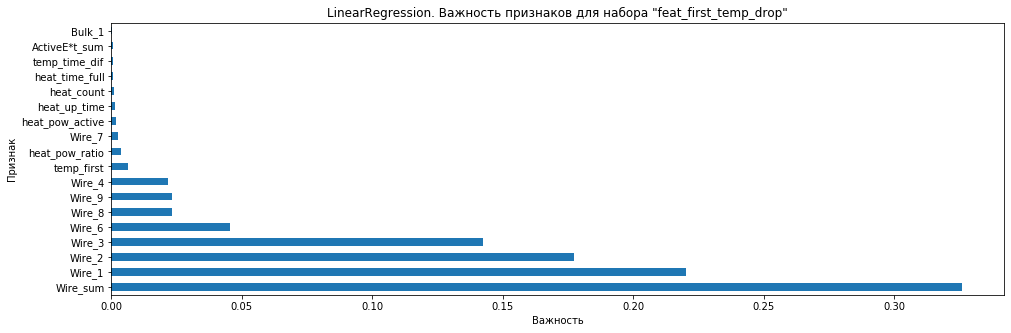

In [115]:
rcoef.nlargest(18).plot(kind='barh', figsize=(16, 5))
plt.title('LinearRegression. Важность признаков для набора "feat_first_temp_drop"')
plt.ylabel('Признак')
plt.xlabel('Важность');

In [116]:
final_table = pd.DataFrame(model_dict).T
final_table

model_name             feat_name model_valid_mae model_fit_time  \
0  LinearRegression             feat_full         3.56257              0   
1  LinearRegression       feat_first_temp         5.84873              0   
2  LinearRegression  feat_first_temp_drop          5.8677              0   
3  LinearRegression               feat_20         6.61946              0   
4  LinearRegression          feat_no_temp         7.35617              0   

  model_pred_time model_test_mae  
0               0        3.54115  
1               0        5.56577  
2               0        5.52818  
3               0        6.47699  
4               0        7.27071

<a name="63"></a>
### DecisionTreeRegressor

<font color='orange' style='font-size:16px; font-weight:bold'> добавлено сохранение и вывод важности признаков

In [117]:
model_dict={}   #словарь для данных по модели
i=0
for feat in feat_list:
    model = DecisionTreeRegressor()
    beg_time = datetime.datetime.now()
    b={}
    b['model_name'] = 'DecisionTreeRegressor'
    b['feat_name'] = feat_name_list[i]
    
    parametrs = { 'max_depth': [4, 5, 7, 8],
                  'min_samples_leaf': [2, 4],
                  'min_samples_split': [4, 14, 20, 30]}
    
    grid = GridSearchCV(model, parametrs, cv=kfold, scoring='neg_mean_absolute_error', iid=True)
    grid.fit(data_train[feat], data_train[target])
    b['params'] = grid.best_params_
    model = DecisionTreeRegressor().set_params(**b['params'])
    b['model_valid_mae'] = -cross_val_score(model, data_train[feat], data_train[target], 
                                            cv=kfold, scoring='neg_mean_absolute_error').mean()
    
    beg_time = datetime.datetime.now()
    model.fit(data_train[feat], data_train[target])
    b['model_fit_time'] = (datetime.datetime.now()-beg_time).seconds
    
    beg_time = datetime.datetime.now()
    model_predicted = model.predict(data_test[feat])
    b['model_pred_time'] = (datetime.datetime.now()-beg_time).seconds
    
    b['model_test_mae'] = mean_absolute_error(data_test[target], model_predicted)
    model_dict[i] = b

    # сохраним важность признаков 
    if feat == feat_first_temp:
        tree_feat_importances = pd.Series(model.feature_importances_, index=feat_first_temp)

        # Меняем список из 20 наиболее значимых
        feat_20 = rcoef.nlargest(20).index.tolist()
    
    print('test MAE:%.1f' %b['model_test_mae'], 'valid MAE:%.1f' %b['model_valid_mae'], b['model_name'], b['feat_name'])
    print(b['params'])
    i+=1

test MAE:4.3 valid MAE:5.0 DecisionTreeRegressor feat_full
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 30}
test MAE:7.0 valid MAE:7.6 DecisionTreeRegressor feat_first_temp
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 14}
test MAE:7.0 valid MAE:7.5 DecisionTreeRegressor feat_first_temp_drop
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20}
test MAE:7.2 valid MAE:7.6 DecisionTreeRegressor feat_20
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20}
test MAE:8.0 valid MAE:8.0 DecisionTreeRegressor feat_no_temp
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 14}


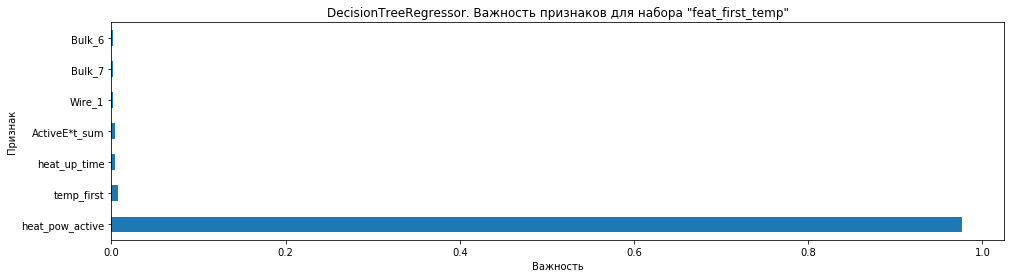

In [118]:
tree_feat_importances.nlargest(7).plot(kind='barh', figsize=(16, 4))
plt.title('DecisionTreeRegressor. Важность признаков для набора "feat_first_temp"')
plt.ylabel('Признак')
plt.xlabel('Важность');

In [119]:
display(pd.DataFrame(model_dict).T)
final_table = pd.concat([final_table, pd.DataFrame(model_dict).T], sort=False)

model_name             feat_name  \
0  DecisionTreeRegressor             feat_full   
1  DecisionTreeRegressor       feat_first_temp   
2  DecisionTreeRegressor  feat_first_temp_drop   
3  DecisionTreeRegressor               feat_20   
4  DecisionTreeRegressor          feat_no_temp   

                                              params model_valid_mae  \
0  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         4.99688   
1  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         7.58135   
2  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         7.50773   
3  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         7.63016   
4  {'max_depth': 4, 'min_samples_leaf': 2, 'min_s...         7.99213   

  model_fit_time model_pred_time model_test_mae  
0              0               0        4.33042  
1              0               0        6.98212  
2              0               0        7.00519  
3              0               0        7.17618  
4              0               0        7.96283

In [120]:
final_table

model_name             feat_name model_valid_mae model_fit_time  \
0       LinearRegression             feat_full         3.56257              0   
1       LinearRegression       feat_first_temp         5.84873              0   
2       LinearRegression  feat_first_temp_drop          5.8677              0   
3       LinearRegression               feat_20         6.61946              0   
4       LinearRegression          feat_no_temp         7.35617              0   
0  DecisionTreeRegressor             feat_full         4.99688              0   
1  DecisionTreeRegressor       feat_first_temp         7.58135              0   
2  DecisionTreeRegressor  feat_first_temp_drop         7.50773              0   
3  DecisionTreeRegressor               feat_20         7.63016              0   
4  DecisionTreeRegressor          feat_no_temp         7.99213              0   

  model_pred_time model_test_mae  \
0               0        3.54115   
1               0        5.56577   
2               0        5.52818   
3               0        6.47699   
4               0        7.27071   
0               0        4.33042   
1               0        6.98212   
2               0        7.00519   
3               0        7.17618   
4               0        7.96283   

                                              params  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
0  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
1  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
2  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
3  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
4  {'max_depth': 4, 'min_samples_leaf': 2, 'min_s...

<a name="64"></a>
### RandomForestRegressor

<font color='orange' style='font-size:16px; font-weight:bold'> добавлено сохранение и вывод важности признаков

In [121]:
model_dict={}   #словарь для данных по модели
i=0
for feat in feat_list:
    model = RandomForestRegressor()
    beg_time = datetime.datetime.now()
    b={}
    b['model_name'] = 'RandomForestRegressor'
    b['feat_name'] = feat_name_list[i]
    
    parametrs = { 'max_depth': [8, 10, 11, 14],
                  'min_samples_leaf': [2],
                  'min_samples_split': [3, 4, 16, 20, 30],
                  'n_estimators': [4, 10, 14, 16]}
    
    grid = GridSearchCV(model, parametrs, cv=kfold, scoring='neg_mean_absolute_error', iid=True)
    grid.fit(data_train[feat].values, data_train[target].values.ravel())
    b['params'] = grid.best_params_
    model = RandomForestRegressor().set_params(**b['params'])
    b['model_valid_mae'] = -cross_val_score(model, data_train[feat].values, data_train[target].values.ravel(), 
                                            cv=kfold, scoring='neg_mean_absolute_error').mean()

    beg_time = datetime.datetime.now()
    model.fit(data_train[feat].values, data_train[target].values.ravel())
    b['model_fit_time'] = (datetime.datetime.now()-beg_time).seconds
    
    beg_time = datetime.datetime.now()
    model_predicted = model.predict(data_test[feat].values)
    b['model_pred_time'] = (datetime.datetime.now()-beg_time).seconds
    
    b['model_test_mae'] = mean_absolute_error(data_test[target].values.ravel(), model_predicted)
    model_dict[i] = b

    # сохраним важность признаков 
    if feat == feat_first_temp:
        forest_feat_importances = pd.Series(model.feature_importances_, index=feat_first_temp)

        # Меняем список из 20 наиболее значимых
        feat_20 = rcoef.nlargest(20).index.tolist()
        
    print('test MAE:%.1f' %b['model_test_mae'], 'valid MAE:%.1f' %b['model_valid_mae'], b['model_name'], b['feat_name'])
    print(b['params'])
    i+=1

test MAE:4.6 valid MAE:5.6 RandomForestRegressor feat_full
{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 14}
test MAE:7.4 valid MAE:7.6 RandomForestRegressor feat_first_temp
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 30, 'n_estimators': 4}
test MAE:6.7 valid MAE:7.4 RandomForestRegressor feat_first_temp_drop
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 16}
test MAE:6.4 valid MAE:7.6 RandomForestRegressor feat_20
{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 16}
test MAE:7.7 valid MAE:8.5 RandomForestRegressor feat_no_temp
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 4}


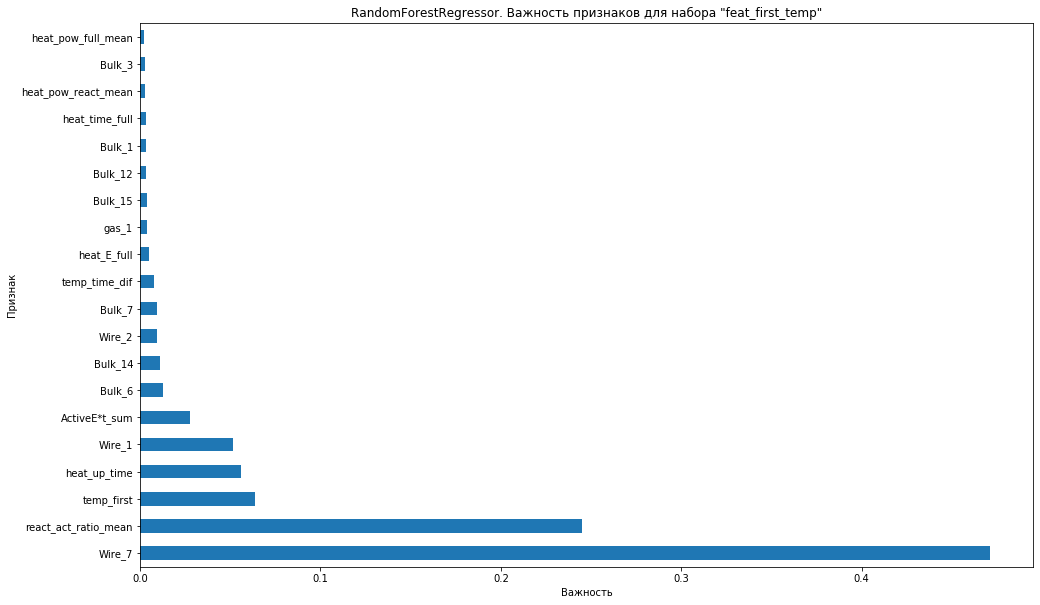

In [122]:
forest_feat_importances.nlargest(20).plot(kind='barh', figsize=(16, 10))
plt.title('RandomForestRegressor. Важность признаков для набора "feat_first_temp"') 
plt.ylabel('Признак')
plt.xlabel('Важность');

In [123]:
display(pd.DataFrame(model_dict).T)
final_table = pd.concat([final_table, pd.DataFrame(model_dict).T], sort=True)

model_name             feat_name  \
0  RandomForestRegressor             feat_full   
1  RandomForestRegressor       feat_first_temp   
2  RandomForestRegressor  feat_first_temp_drop   
3  RandomForestRegressor               feat_20   
4  RandomForestRegressor          feat_no_temp   

                                              params model_valid_mae  \
0  {'max_depth': 11, 'min_samples_leaf': 2, 'min_...         5.60534   
1  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         7.60898   
2  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...         7.40646   
3  {'max_depth': 11, 'min_samples_leaf': 2, 'min_...         7.57754   
4  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...         8.48316   

  model_fit_time model_pred_time model_test_mae  
0              0               0        4.63129  
1              0               0        7.37218  
2              0               0        6.67071  
3              0               0        6.41167  
4              0               0        7.67919

<a name="65"></a>
### LightGBM

<font color='orange' style='font-size:16px; font-weight:bold'> добавлено сохранение и вывод важности признаков

In [124]:
model_dict={}   #словарь для данных по модели
i=0
for feat in feat_list:
    model = LGBMRegressor()
    beg_time = datetime.datetime.now()
    b={}
    b['model_name'] = 'LGBMRegressor'
    b['feat_name'] = feat_name_list[i]
    
    parametrs = { 'metric': ['mae'],
                  'boosting_type': ['gbdt'],
                  'learning_rate': [0.05],
                  'n_estimators': [2000, 3000],
                  'max_depth': [3, 10, 14]}
    
    grid = GridSearchCV(model, parametrs, cv=kfold, scoring='neg_mean_absolute_error', iid=True)
    grid.fit(data_train[feat].values, data_train[target].values.ravel())
    b['params'] = grid.best_params_
    model = LGBMRegressor().set_params(**b['params'])
    b['model_valid_mae'] = -cross_val_score(model, data_train[feat].values, data_train[target].values.ravel(), 
                                            cv=kfold, scoring='neg_mean_absolute_error').mean()

    beg_time = datetime.datetime.now()
    model.fit(data_train[feat].values, data_train[target].values.ravel())
    b['model_fit_time'] = (datetime.datetime.now()-beg_time).seconds
    
    beg_time = datetime.datetime.now()
    model_predicted = model.predict(data_test[feat].values)
    b['model_pred_time'] = (datetime.datetime.now()-beg_time).seconds
    
    b['model_test_mae'] = mean_absolute_error(data_test[target].values.ravel(), model_predicted)
    model_dict[i] = b

    # сохраним важность признаков        
    if feat == feat_first_temp:
        lgbm_feat_importances = pd.Series(
            model.feature_importances_, index=feat_first_temp)/model.feature_importances_.sum()      

        # Меняем список из 20 наиболее значимых
        feat_20 = rcoef.nlargest(20).index.tolist()
        
    print('test MAE:%.1f' %b['model_test_mae'], 'valid MAE:%.1f' %b['model_valid_mae'], b['model_name'], b['feat_name'])
    print(b['params'])
    i+=1

test MAE:4.6 valid MAE:5.6 LGBMRegressor feat_full
{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'metric': 'mae', 'n_estimators': 3000}
test MAE:7.3 valid MAE:7.3 LGBMRegressor feat_first_temp
{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'metric': 'mae', 'n_estimators': 3000}
test MAE:6.9 valid MAE:6.7 LGBMRegressor feat_first_temp_drop
{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'metric': 'mae', 'n_estimators': 3000}
test MAE:7.0 valid MAE:6.4 LGBMRegressor feat_20
{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'metric': 'mae', 'n_estimators': 3000}
test MAE:8.7 valid MAE:8.2 LGBMRegressor feat_no_temp
{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'metric': 'mae', 'n_estimators': 3000}


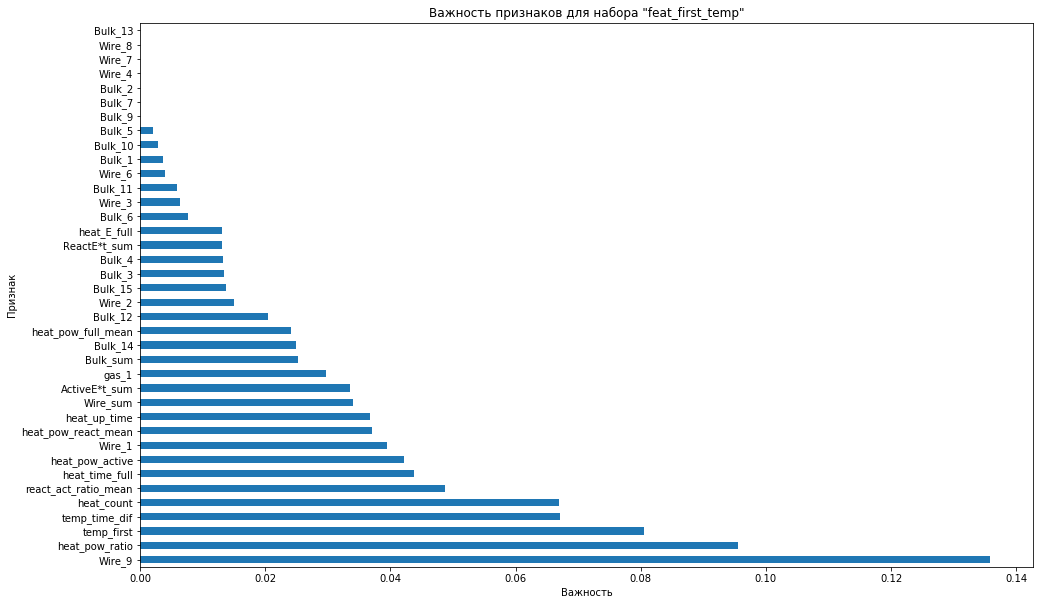

In [125]:
lgbm_feat_importances.nlargest(50).plot(kind='barh', figsize=(16, 10)) #.nlargest(30)
plt.title('Важность признаков для набора "feat_first_temp"') 
plt.ylabel('Признак')
plt.xlabel('Важность');

In [126]:
display(pd.DataFrame(model_dict).T)
final_table = pd.concat([final_table, pd.DataFrame(model_dict).T], sort=False)

model_name             feat_name  \
0  LGBMRegressor             feat_full   
1  LGBMRegressor       feat_first_temp   
2  LGBMRegressor  feat_first_temp_drop   
3  LGBMRegressor               feat_20   
4  LGBMRegressor          feat_no_temp   

                                              params model_valid_mae  \
0  {'boosting_type': 'gbdt', 'learning_rate': 0.0...         5.55117   
1  {'boosting_type': 'gbdt', 'learning_rate': 0.0...         7.25736   
2  {'boosting_type': 'gbdt', 'learning_rate': 0.0...         6.65006   
3  {'boosting_type': 'gbdt', 'learning_rate': 0.0...         6.36836   
4  {'boosting_type': 'gbdt', 'learning_rate': 0.0...         8.23424   

  model_fit_time model_pred_time model_test_mae  
0              6               0        4.57386  
1              6               0        7.30945  
2              5               0        6.90827  
3              5               0        7.02982  
4              6               0         8.6745

<a name="66"></a>
### CatBoost

<font color='orange' style='font-size:16px; font-weight:bold'> добавлено сохранение и вывод важности признаков

In [127]:
model_dict={}   #словарь для данных по модели
i=0
for feat in feat_list:
    model = CatBoostRegressor()
    beg_time = datetime.datetime.now()
    b={}
    b['model_name'] = 'CatBoostRegressor'
    b['feat_name'] = feat_name_list[i]
    
    mae = 0
    for tr, val in kfold.split(data_train.index):
        data_tr = data_train.iloc[tr]
        data_val = data_train.iloc[val]
        model = CatBoostRegressor()
        model.fit(data_tr[feat].values, data_tr[target].values.ravel())
        model_predicted = model.predict(data_val[feat].values)
        mae += mean_absolute_error(data_val[target].values.ravel(), model_predicted)
    b['model_valid_mae'] = mae/5
    
    beg_time = datetime.datetime.now()
    model.fit(data_train[feat].values, data_train[target].values.ravel())
    b['model_fit_time'] = (datetime.datetime.now()-beg_time).seconds
    
    beg_time = datetime.datetime.now()
    model_predicted = model.predict(data_test[feat].values)
    b['model_pred_time'] = (datetime.datetime.now()-beg_time).seconds
    
    b['model_test_mae'] = mean_absolute_error(data_test[target].values.ravel(), model_predicted)
    model_dict[i] = b

    # сохраним важность признаков
    if feat == feat_first_temp:
        catboost_feat_importances = pd.Series(
            model.feature_importances_, index=feat_first_temp)/model.feature_importances_.sum()

        # Меняем список из 20 наиболее значимых
        feat_20 = rcoef.nlargest(20).index.tolist()
    
    print('test MAE:%.1f' %b['model_test_mae'], 'valid MAE:%.1f' %b['model_valid_mae'], b['model_name'], b['feat_name'])
    i+=1

0:	learn: 58.0088997	total: 51ms	remaining: 50.9s
1:	learn: 57.3329948	total: 54.1ms	remaining: 27s
2:	learn: 56.6670909	total: 56ms	remaining: 18.6s
3:	learn: 56.0035273	total: 59.2ms	remaining: 14.7s
4:	learn: 55.3502537	total: 134ms	remaining: 26.7s
5:	learn: 54.7050601	total: 137ms	remaining: 22.6s
6:	learn: 54.0716228	total: 138ms	remaining: 19.5s
7:	learn: 53.4423494	total: 139ms	remaining: 17.3s
8:	learn: 52.8219993	total: 141ms	remaining: 15.6s
9:	learn: 52.2094210	total: 148ms	remaining: 14.7s
10:	learn: 51.6065747	total: 231ms	remaining: 20.8s
11:	learn: 51.0121391	total: 233ms	remaining: 19.2s
12:	learn: 50.4211538	total: 235ms	remaining: 17.8s
13:	learn: 49.8352159	total: 237ms	remaining: 16.7s
14:	learn: 49.2614832	total: 238ms	remaining: 15.6s
15:	learn: 48.6929905	total: 245ms	remaining: 15.1s
16:	learn: 48.1204238	total: 329ms	remaining: 19s
17:	learn: 47.5671288	total: 331ms	remaining: 18.1s
18:	learn: 47.0149662	total: 333ms	remaining: 17.2s
19:	learn: 46.4732408	tota

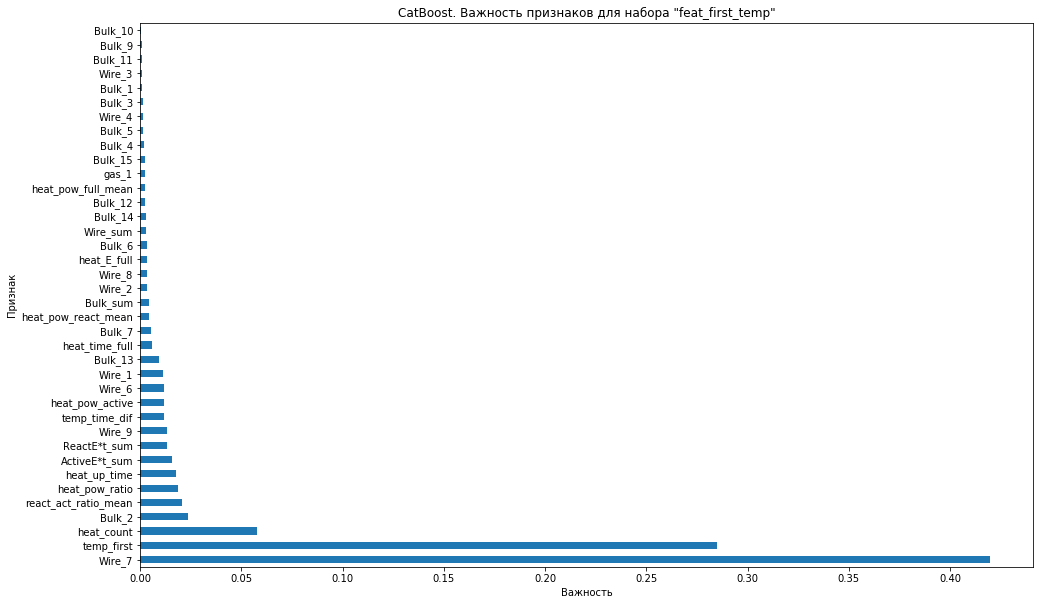

In [128]:
catboost_feat_importances.nlargest(50).plot(kind='barh', figsize=(16, 10)) #.nlargest(30)
plt.title('CatBoost. Важность признаков для набора "feat_first_temp"') 
plt.ylabel('Признак')
plt.xlabel('Важность');   

In [129]:
display(pd.DataFrame(model_dict).T)
final_table = pd.concat([final_table, pd.DataFrame(model_dict).T], sort=False)

model_name             feat_name model_valid_mae model_fit_time  \
0  CatBoostRegressor             feat_full         3.43461             20   
1  CatBoostRegressor       feat_first_temp         5.42197             18   
2  CatBoostRegressor  feat_first_temp_drop         5.44744             15   
3  CatBoostRegressor               feat_20         5.57274             11   
4  CatBoostRegressor          feat_no_temp         6.76561             18   

  model_pred_time model_test_mae  
0               0         3.4339  
1               0        5.63658  
2               0        5.61288  
3               0        5.91621  
4               0        7.10316

<a name="67"></a>
### Сравнение моделей.

In [130]:
final_table

feat_name model_fit_time             model_name model_pred_time  \
0             feat_full              0       LinearRegression               0   
1       feat_first_temp              0       LinearRegression               0   
2  feat_first_temp_drop              0       LinearRegression               0   
3               feat_20              0       LinearRegression               0   
4          feat_no_temp              0       LinearRegression               0   
0             feat_full              0  DecisionTreeRegressor               0   
1       feat_first_temp              0  DecisionTreeRegressor               0   
2  feat_first_temp_drop              0  DecisionTreeRegressor               0   
3               feat_20              0  DecisionTreeRegressor               0   
4          feat_no_temp              0  DecisionTreeRegressor               0   
0             feat_full              0  RandomForestRegressor               0   
1       feat_first_temp              0  RandomForestRegressor               0   
2  feat_first_temp_drop              0  RandomForestRegressor               0   
3               feat_20              0  RandomForestRegressor               0   
4          feat_no_temp              0  RandomForestRegressor               0   
0             feat_full              6          LGBMRegressor               0   
1       feat_first_temp              6          LGBMRegressor               0   
2  feat_first_temp_drop              5          LGBMRegressor               0   
3               feat_20              5          LGBMRegressor               0   
4          feat_no_temp              6          LGBMRegressor               0   
0             feat_full             20      CatBoostRegressor               0   
1       feat_first_temp             18      CatBoostRegressor               0   
2  feat_first_temp_drop             15      CatBoostRegressor               0   
3               feat_20             11      CatBoostRegressor               0   
4          feat_no_temp             18      CatBoostRegressor               0   

  model_test_mae model_valid_mae  \
0        3.54115         3.56257   
1        5.56577         5.84873   
2        5.52818          5.8677   
3        6.47699         6.61946   
4        7.27071         7.35617   
0        4.33042         4.99688   
1        6.98212         7.58135   
2        7.00519         7.50773   
3        7.17618         7.63016   
4        7.96283         7.99213   
0        4.63129         5.60534   
1        7.37218         7.60898   
2        6.67071         7.40646   
3        6.41167         7.57754   
4        7.67919         8.48316   
0        4.57386         5.55117   
1        7.30945         7.25736   
2        6.90827         6.65006   
3        7.02982         6.36836   
4         8.6745         8.23424   
0         3.4339         3.43461   
1        5.63658         5.42197   
2        5.61288         5.44744   
3        5.91621         5.57274   
4        7.10316         6.76561   

                                              params  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
0  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
1  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
2  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
3  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  
4  {'max_depth': 4, 'min_samples_leaf': 2, 'min_s...  
0  {'max_depth': 11, 'min_samples_leaf': 2, 'min_...  
1  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
2  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...  
3  {'max_depth': 11, 'min_samples_leaf': 2, 'min_...  
4  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...  
0  {'boosting_type': 'gbdt', 'learning_rate': 0.0...  
1  {'boosting_type': 'gbdt', 'learn

In [131]:
pivot_feat_importances = pd.concat([rcoef, tree_feat_importances, forest_feat_importances, 
                                    lgbm_feat_importances, catboost_feat_importances], axis=1)
pivot_feat_importances.columns = ['LR_fi', 'tree_fi', 'forest_fi', 'lgbm_fi', 'catboost_fi']
#pivot_feat_importances

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [132]:
#pivot_feat_importances.plot(kind='bar', figsize=(16, 10))
#plt.show() 

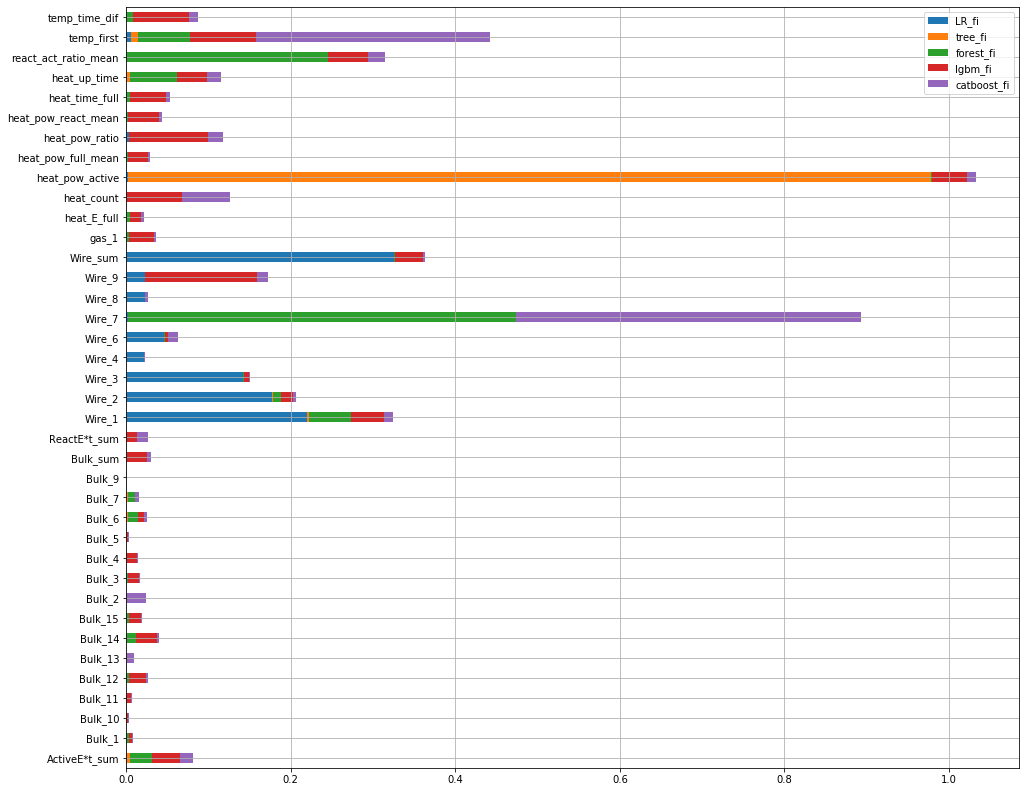

In [133]:
pivot_feat_importances.plot(kind='barh',stacked=True, figsize=(16, 14), grid = True)
plt.show()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Олег, скажу, что уверенная работа, на мой взгляд)<br>
Ты просто - аналитиеский монстр:)
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
<font color='red'>    
1) При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее)<br><br>
    
2) Попробуй с помощью команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют.<br>
    
3) Из температур - лучше использовать только первую по партии (та, с которой поступает металл).<br>    
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти пунктs - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

<font color='orange' style='font-size:16px; font-weight:bold'> вроде критичные моменты закрыл

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
ОК, Олег! Увидел твои доработки - просмотрел всё жёлтые комментарии.<br>
Радует такое многообразие моделей! Принято.<br>

Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
<font color='green'>

Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)

<a name="7"></a>
## Общий вывод.

<div class="alert alert-block alert-info">
<b>Вывод по процессу выполнения проекта:</b>  
</div>

В целом работа проведена согласно пунктам плана. При разделении данных не реализована запланированная стратификация (по количеству измерений температуры или количеству нагревов) т.к. улучшения метрики не наблюдалось.

Удивили низкие значения средней абсолютной ошибки у линейной регресии.

<div class="alert alert-block alert-info">
<b>Вывод по данным:</b>  
</div>

В подготовленном к обучению наборе данных информация по 2345 партиям и 38 (+1 целевой) признаков.
Для создания прототипа модели достаточно, но для отладки и уверенного обучения моделей количество партий необходимо увеличить.

Входящие данные имеют значительное количество пропусков: 
* отсутствующие значения температуры для партий 2500-3241 (есть только 1 значение температуры) - около 23%

Встречаются экстремальные значения(выбросы): 
* реактивная мощность "-715" в партии 2116
* партии длительностью более 2 ч. 14 мин.: 44, 46, 118, 638, 641, 801, 1513, 1689, 1880, 1881, 1958, 2107, 2108 - 0,5%
* партии длительностью менее 6 мин.: 151, 600, 720, 744, 800, 812, 977, 1105, 1116, 1334, 1381, 2254, 2486 - 0,5%

Редкие признаки: 
* данные о подаче сыпучих материалов из "Bulk_8" только в партии 1786 
* данные о подаче проволочных материалов из "Wire_5" только в партии 2567

Ошибки требующие комментариев со стороны заказчика:
* непоследовательные измерения температуры разных партий - около 10-15 участков по 3-4 партии (например партии 44-48)
* высокое значение подачи сыпучих материалов (Bulk 12 и Bulk_sum) в партии 303
* для некоторых партий отсутствуют данные о подаче сыпучих и проволочных материалов

(дополнительно см. разделы: 
* [Изучение и подготовка данных](#32), 
* [Удаление данных с ошибками](#33), 
* [Создание дополнительных признаков](#34), 
* [Исследовательский анализ данных](#411)

<div class="alert alert-block alert-info">
<b>Вывод по обучению и тестированию моделей:</b>  
</div>

Из условий задачи не ясно планирует ли заказчик в дальнейшем проводить измерения температуры в процессе обработки стали. Поэтому модели проверялись на нескольких наборах признаков. После уточнения условий из всех признаков сформированных из данных о температуре было решено оставить только начальное значение температуры. Поэтому результаты полученные на полном наборе признаков в расчет не берем.

Исследованы 5 моделей. Наименьшее значение средней абсолютной ошибки на тестовых данных (около 5,6 градусов) у CatBoostRegressor и линейная регрессия. 

Лучшее время обучения и предсказания ожидаемо у линейной регресии, при этом для данных с уменьшеным количеством признаков ошибка растет меньше у CatBoostRegressor (для 20 признаков средняя ошибка 5,9 градусов)

Модели для обучения используют разные признаки. 

Информация по исследованным моделям в [сводной таблице](#67). <font color='orange' style='font-size:12px; font-weight:bold'> заменить в моделях получение времени с .seconds на .microseconds/1000 </font>

Снизить показатели средней ошибки моделей вероятно позволят следующие мероприятия: 

* более широкий подбор параметров моделей
* подбор оптимальных наборов признаков (по значимости и зависимости между собой)
* использование в моделях признаков на основании времени первого измерения температуры (в какой момент процесса производится в данной партии) и времени внесения добавок
* введение дополнительного параметра (сдвига) в связи с "инертностью" передачи тепловой энергии при нагреве и соответствующего запаздывания изменения температуры (в какой момент получены данные о целевом признаке)
* более "въедлевая" работа с выбросами и пропусками

Таким образом на окончательный выбор модели влияют:

* простота, точность и надежность получения используемых моделью признаков
* точность и стабильность предсказания
* скорость обучения и предсказания модели (если важно)

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>КОММЕНТАРИЙ ТИМЛИДА ЗАКЛЮЧИТЕЛЬНЫЙ</b><br/>
    
Олег, привет! <br/>
Поздравляю со сдачей финального проекта! 🙌🙌🙌<br/>
Что хотелось бы отметить.<br/>
Ты составил отличный план и это проявило себя в достойном результате 👍👍👍<br/>
Ты очень хорошо провёл исследовательский анализ данных. Выявил и устранил выбросы, исследовал и оценил пропуски. Хорошо сформировал признаки. Исследовал признаки на коллинеарность и значимость и это привело к сокращению их количества. В проекте с несколькими тысячами признаков это может серьёзно облегчить жизнь. Исследовал разные типы моделей, что говорит о том, что ты уверенно владеешь различными инструментами. У тебя получилось отличное качество модели. Резултаты моделей для удобства сведены в табличку. Финальный отчёт достойно завершает хорошую работу, даёт полное представление о том, что планировалось сделать, что удалось и как достигалось. Здорово! Со стилем тоже всё хорошо. Отличное оформление, чистый код. Прекрасная визуализация, графики и текстовые комментарии дают хорошую картину о полученных результатах.<br/>
Над чем можно было бы поработать? Я бы предложил дополнить финальный отчёт графиком сравнения таргета и предсказания, это наглядно и убедительно. А в остальном - всё здорово.<br/>
Ещё раз от всей души поздравляю со сдачей проекта и окончанием курса! 👏👏👏
</div>